# Faster than training from scratch 
# Fine-tuning the English GPT-2 in any language with Hugging Face and fastai v2 (practical case with Portuguese)

> Tutorial on how to use fastai v2 over Hugging Face's Transformers and Tokenizers libraries to fine-tune an English pre-trained transformer-based language model (GPT-2) to any language other than English

- Author: [Pierre Guillou](https://www.linkedin.com/in/pierreguillou)
- Date: July 2020 (14/07/2020)
- Post in medium: [Faster than training from scratch - Fine-tuning the English GPT-2 in any language with Hugging Face and fastai v2 (practical case with Portuguese)](https://medium.com/@pierre_guillou/faster-than-training-from-scratch-fine-tuning-the-english-gpt-2-in-any-language-with-hugging-f2ec05c98787)
- Fast notebook: [finetuning-English-GPT2-any-language-Portuguese-HuggingFace-fastaiv2_FAST.ipynb](https://github.com/piegu/fastai-projects/blob/master/finetuning-English-GPT2-any-language-Portuguese-HuggingFace-fastaiv2_FAST.ipynb)
- Hugging face model page of [GPorTuguese-2](https://huggingface.co/pierreguillou/gpt2-small-portuguese): a language model for Portuguese text generation (and more NLP tasks...)
- Other posts in medium of the GPT-2 series: 
  - [NLP & fastai | GPT-2](https://medium.com/@pierre_guillou/nlp-fastai-gpt-2-16ee145a4a28)
  - [Byte-level BPE, an universal tokenizer but...](https://medium.com/@pierre_guillou/byte-level-bpe-an-universal-tokenizer-but-aff932332ffe)

## Overview

In this tutorial, instead of training from scratch, we will see how to fine-tune in just over a day, on one GPU and with a little more than 1GB of training data an English pre-trained [transformer](https://arxiv.org/abs/1706.03762)-based language model to any another language. 

As a practical case, we fine-tune to Portuguese the [English pre-trained GPT-2](https://github.com/openai/gpt-2) by wrapping the [Transformers](https://github.com/huggingface/transformers) and [Tokenizers](https://github.com/huggingface/tokenizers) libraries of Hugging Face into [fastai v2](https://github.com/fastai/fastai2). We thus create a new language model: [GPorTuguese-2](https://huggingface.co/pierreguillou/gpt2-small-portuguese), a language model for Portuguese text generation (and more NLP tasks...).

![The 3 main steps of fine-tuning the English GPT-2 to Portuguese with Hugging Face and fastai v2 (image edited from fast.ai NLP)](images/GPT2_tf_ft_approach.png "The 3 main steps of fine-tuning the English GPT-2 to Portuguese with Hugging Face and fastai v2 (image edited from fast.ai NLP)")

## Texts generated by GPorTuguese-2 on Covid-19 and unicorns

![Examples of texts generated by GPorTuguese-2 (Portuguese GPT-2 small) on Covid-19 and unicorns](images/4texts.png "Examples of texts generated by GPorTuguese-2 (Portuguese GPT-2 small) on Covid-19 and unicorns")

## Acknowledgment

This tutorial was made possible thanks to the computing power of the [AI Lab](https://www.linkedin.com/company/ailab-unb/) (University of Brasilia) to which I am attached as an Associate Researcher in NLP and the participation of its directors in the definition of the NLP strategy, Professors [Fabricio Ataides Braz](https://www.linkedin.com/in/fabricio-braz-b356457/) and [Nilton Correia da Silva](https://www.linkedin.com/in/nilton-silva-6097853/). Thank you so much!

And special thanks to Sylvain Gugger for his [tutorial on Transformers and fastai v2](https://dev.fast.ai/tutorial.transformers) which is the basis of this tutorial.

## Table of contents

- [Overview](#Overview)
- [Texts generated by GPorTuguese-2 on Covid-19 and unicorns](#Texts-generated-by-GPorTuguese-2-on-Covid-19-and-unicorns)
- [Acknowledgment](#Acknowledgment)
- [Post, notebooks, Web App and model download](#Post,-notebooks,-Web-App-and-model-download)
- [Results](#Results)
- [About the need for language models not just in English... and how to do it in real life](#About-the-need-for-language-models-not-just-in-English...-and-how-to-do-it-in-real-life)
  - [(option 1) Fast pipeline to localize any transformer-based model to any language](#(option-1)-Fast-pipeline-to-localize-any-transformer-based-model-to-any-language)
  - [(option 2) Fine-tuning of an existing pre-trained model](#(option-2)-Fine-tuning-of-an-existing-pre-trained-model)
- [Why using fastai v2 over Hugging Face libraries to fine-tune a pre-trained transformer-based language model?](#Why-using-fastai-v2-over-Hugging-Face-libraries-to-fine-tune-a-pre-trained-transformer-based-language-model?)
  - [Tokenizers and Transformers from Hugging Face](#Tokenizers-and-Transformers-from-Hugging-Face)
  - [fastai v2](#fastai-v2)
- [About the choice of GPT-2](#About-the-choice-of-GPT-2)
- [References](#References)
  - [GPT-2](#GPT-2)
  - [Datasets in Portuguese](#Datasets-in-Portuguese)
  - [Hugging Face](#Hugging-Face)
  - [Pytorch, fastai & Transformers (Hugging Face)](#Pytorch,-fastai-&-Transformers-(Hugging-Face))
- [Main coding steps to fine-tune a Hugging Face language model with fastai v2](#Main-coding-steps-to-fine-tune-a-Hugging-Face-language-model-with-fastai-v2)
  - [1. Initialization](#Initialization)
  - [2. Download Wikipedia in Portuguese](#2.-Download-Wikipedia-in-Portuguese)
  - [3. Download a GPT-2 English pre-trained model and train a GPT-2 tokenizer with a vocab in Portuguese](#3.-Download-a-GPT-2-English-pre-trained-model-and-train-a-GPT-2-tokenizer-with-a-vocab-in-Portuguese)
  - [4. Create a fastai tokenizer and update the embeddings matrix of the GPT-2 English pre-trained model](#4.-Create-a-fastai-tokenizer-and-update-the-embeddings-matrix-of-the-GPT-2-English-pre-trained-model)
    - [4.1 GPT2TokenizerFast (imported GPT-2 tokenizer) --> fastai Tokenizer](#4.1-GPT2TokenizerFast-(imported-GPT-2-tokenizer)--->-fastai-Tokenizer)
    - [4.2 Change vocab embeddings (wte matrix) in the GPT-2 pre-trained model to adapt to the Portuguese vocab](#4.2-Change-vocab-embeddings-(wte-matrix)-in-the-GPT-2-pre-trained-model-to-adapt-to-the-Portuguese-vocab)
  - [5. Create fastai v2 Datasets and Dataloaders](#5.-Create-fastai-v2-Datasets-and-Dataloaders)
    - [5.1 fastai v2 Datasets](#5.1-fastai-v2-Datasets)
      - [Visualize Data](#Visualize-Data)
      - [Sample (this allows us to quickly test our code)](#Sample-(this-allows-us-to-quickly-test-our-code))
      - [All data](#All-data)
      - [Check datasets](#Check-datasets)
    - [5.2 fastai v2 Dataloaders](#5.2-fastai-v2-Dataloaders)
- [Model sharing and uploading in the Hugging Face model hub](#Model-sharing-and-uploading-in-the-Hugging-Face-model-hub)
- [Text Generation by our Portuguese GPT-2](#Text-Generation-by-our-Portuguese-GPT-2)
  - [Famous OpenAI generated text about unicorns](#Famous-OpenAI-generated-text-about-unicorns)
  - [Text generation techniques]()
    - [Text Generation techniques](#Text-generation-techniques)
      - [(Use case 1) Top-k sampling](#(Use-case-1)-Top-k-sampling)
      - [(Use case 2) Top-p (nucleus) sampling](#(Use-case-2)-Top-p-(nucleus)-sampling)
    - [Text n°1 | Famous OpenAI generated text about unicorns](#Text-n°1-|-Famous-OpenAI-generated-text-about-unicorns)
    - [Text n°2 | Recent text on the coronavirus disease (Covid-19)](#Text-n°2-|-Recent-text-on-the-coronavirus-disease-(Covid-19))

## Post, notebooks, Web App and model download

The main code of the tutorial is published in this post ([Faster than training from scratch - Fine-tuning the English GPT-2 in any language with Hugging Face and fastai v2 (practical case with Portuguese)](https://medium.com/@pierre_guillou/faster-than-training-from-scratch-fine-tuning-the-english-gpt-2-in-any-language-with-hugging-f2ec05c98787)), organized by paragraph. 

The complete code is in this notebook. However, as this notebook is very detailed, you can use this fast notebook finetuning-English-GPT2-any-language-Portuguese-HuggingFace-fastaiv2_FAST.ipynb (nbviewer version) if you just want to execute the code without explanation.

In addition, our **GPorTuguese-2 (Portuguese GPT-2 small) , a language model for Portuguese text generation (and more NLP tasks...)**, is testable online in the [Hugging face model hub](https://huggingface.co/models) with all usage information at this address: https://huggingface.co/pierreguillou/gpt2-small-portuguese

![GPorTuguese-2 (Portuguese GPT-2 small) , a language model for Portuguese text generation (and more NLP tasks...)](images/hfmh.png "GPorTuguese-2 (Portuguese GPT-2 small) , a language model for Portuguese text generation (and more NLP tasks...)")

## Results

In a little more than a day (we only used one GPU NVIDIA V100 32GB; through a Distributed Data Parallel (DDP) training mode, we could have divided by three this time to 10 hours, just with 2 GPUs), **we got a loss of 3.17, an accuracy of 37.99% and a perplexity of 23.76** (see the validation results table below and explications about perplexity at the end of the paragraph). Happy!

```
+------------+------+----------+------------+----------+-----------+
|   after    | loss | accuracy | perplexity |   time   | cumulative|
| ... epochs |      |   (%)    |            | by epoch |    time   |
+------------+------+----------+------------+----------+-----------+
|      0     | 9.95 |    9.90  |  20950.94  | 00:00:00 | 00:00:00  |
|      1     | 3.64 |   32.52  |     38.12  |  5:48:31 |  5:48:31  |
|      2     | 3.30 |   36.29  |     27.16  |  5:38:18 | 11:26:49  |
|      3     | 3.21 |   37.46  |     24.71  |  6:20:51 | 17:47:40  |
|      4     | 3.19 |   37.74  |     24.21  |  6:06:29 | 23:54:09  |
|      5     | 3.17 |   37.99  |     23.76  |  6:16:22 | 30:10:31  |
+------------+------+----------+------------+----------+-----------+
                 Fine-tuning of GPT-2 into Portuguese
               Table of training and validation results
```

![Validation loss and accuracy of pre-trained English GPT-2 of Hugging Face fine-tuned to Portuguese by fastai v2](images/gpt2_loss_acc_finetuned_fastaiv2.png "Validation loss and accuracy of pre-trained English GPT-2 of Hugging Face fine-tuned to Portuguese by fastai v2")

**After a huge gain at the end of the first epoch (see validation results graph below), the validation accuracy continues to improve until the end of training but less** (it goes to nearly 40%, that is considered a good performance for a language model - check these notebooks [nn-vietnamese.ipynb](https://github.com/fastai/course-nlp/blob/master/nn-vietnamese.ipynb) and [nn-turkish.ipynb](https://github.com/fastai/course-nlp/blob/master/nn-turkish.ipynb) from Jeremy Howard of fastai).

To read more about these results, read the post ["Faster than training from scratch - Fine-tuning the English GPT-2 in any language with Hugging Face and fastai v2 (practical case with Portuguese)"](https://medium.com/@pierre_guillou/faster-than-training-from-scratch-fine-tuning-the-english-gpt-2-in-any-language-with-hugging-f2ec05c98787).

## About the need for language models not just in English... and how to do it in real life

Even if English is today the most spoken language in the world, **the world is multilingual**. It is therefore necessary to have **natural language models trained in all existing languages**, and not just in English, since these models constitute the essential basis for the training of models capable of performing a particular task in linguistics (classification, Q&A, synthesis, entity searches, etc.).

However, if it is extremely simple and free to download a language model trained in English via in particular the [Transformers library](https://huggingface.co/transformers/) of Hugging Face, it is often much more difficult to find online a model trained in another language. 

### (option 1) Fast pipeline to localize any transformer-based model to any language

The easiest way to get theses language-specific language models would be to **use a pipeline of existing pre-trained transformer-based models** like the following one:

![pipeline of existing pre-trained transformer-based models with a translator one at the input and output (image edited from fast.ai NLP)](images/trans_tf.png "pipeline of existing pre-trained transformer-based models with a translator one at the input and output (image edited from fast.ai NLP)")

For example, to obtain a Portuguese GPT-2, we could download from the [Transformers](https://github.com/huggingface/transformers) library of Hugging Face the [OpenAI GPT-2 pre-trained in English](https://huggingface.co/transformers/model_doc/gpt2.html) and the [MarianMT](https://huggingface.co/transformers/model_doc/marian.html) translator (we could also use [BART](https://huggingface.co/transformers/model_doc/bart.html) or [T5](https://huggingface.co/transformers/model_doc/t5.html) for the translation) in order to create the following pipeline:
```
                (input) Portuguese to English (MarianMT) 
                          >> English pre-trained language model (GPT-2) 
                                    >> (output) English to Portuguese (MarianMT)
```

So, for free and with only a few lines of code, we can get any language model in any language, and even any task-oriented NLP model (classification, Q&A, synthesis, entity searches, etc.) using the same pipeline. Not bad!

We will find the code of this pipeline and examples of use for text generation in the post "**Fast pipeline to localize any transformer-based model to any language**".

However, **the problem with this simple solution is that we depend on the quality of training of 2 pre-trained NLP models, which greatly increases the risk of losing the linguistic singularities and nuances of the desired language**.

### (option 2) Fine-tuning of an existing pre-trained model

Therefore, it often becomes necessary to have to train its own language model.

Nevertheless, training from scratch a powerful language model like [GPT-2](https://github.com/openai/gpt-2) or [GPT-3](https://github.com/openai/gpt-3) of OpenAI, [BART](https://arxiv.org/abs/1910.13461) of Facebook or [T5](https://ai.googleblog.com/2020/02/exploring-transfer-learning-with-t5.html) of Google requires tens or even hundreds of GB of text, which is impossible or difficult to find or requires power gigantic computing that only a few companies in the world have. For example,
- [GPT-2 Extra-Large](https://openai.com/blog/gpt-2-1-5b-release/) (1.5 billion parameters) was trained on 40GB of WebText on [32 Cloud TPU v3](https://twitter.com/teradimich/status/1096232184875233280) for 1 week ([cost of 43.008 dollars](https://twitter.com/Smerity/status/1096268294942674946))
- [CamemBERT, the BERT in French, was trained on 38GB of raw text on 256 GPUs (32 GB Tesla V100) for 1 day](https://github.com/huggingface/transformers/issues/1356#issuecomment-561691234)
- [RoBERTa was pre-trained for 24 hours on 1,024 (full size, 32GB) V100s](https://github.com/huggingface/transformers/issues/1356#issuecomment-536187777)... and we are not talking about T5 or GPT-3 whose [computational cost was estimated at 4.6 million of dollars](https://lambdalabs.com/blog/demystifying-gpt-3/)! ("*We are waiting for OpenAI to reveal more details about the training infrastructure and model implementation. But to put things into perspective, GPT-3 175B model required 3.14E23 FLOPS of computing for training. Even at theoretical 28 TFLOPS for V100 and lowest 3 year reserved cloud pricing we could find, this will take 355 GPU-years and cost 4.6M dollars for a single training run.*")

![NLP models through time, with their number of parameters (Image credit: TensorFlow blog)](images/NLPmodels.png "NLP models through time, with their number of parameters (Image credit: TensorFlow blog)")

Thus, as it is easy to download a few GB of texts from an online language corpus ([Wikipedia](https://dumps.wikimedia.org/), [OSCAR](https://oscar-corpus.com/), [Common Crawl](https://commoncrawl.org/) for example) and rent a NVIDIA V100 GPU for $1.24 an hour ([GCP](https://cloud.google.com/), [AWS](https://aws.amazon.com/), [Azur](https://azure.microsoft.com/) for example), **it is more realistic for the majority of people and organizations wishing to use a language model other than English to fine-tune on few GB of texts a model already pre-trained in English** (i.e. fine-tuning a model obtained by Transfer Learning) using Deep Learning frameworks such as [TensorFlow](https://www.tensorflow.org/)+[Keras](https://keras.io/) or [PyTorch](https://pytorch.org/)+[fastai](https://dev.fast.ai/).

This tutorial show how to implement this second option and you will find examples of use for text generation in the paragraph [Text Generation by our Portuguese GPT-2](##Text-Generation-by-our-Portuguese-GPT-2) at the end of this tutorial.

## Why using fastai v2 over Hugging Face libraries to fine-tune a pre-trained transformer-based language model?

### Tokenizers and Transformers from Hugging Face

The [Tokenizers](https://github.com/huggingface/tokenizers) and [Transformers](https://huggingface.co/transformers/) library from [Hugging Face](https://huggingface.co/) are today **the most up-to-date NLP libraries (Natural Language Processing)** used all over the world.

Let's copy and paste the most important information from the [Transformers documentation](https://huggingface.co/transformers/):

> Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet...) for Natural Language Understanding (NLU) and Natural Language Generation (NLG) with over 32+ [pretrained models](https://huggingface.co/transformers/pretrained_models.html) in 100+ languages and deep interoperability between TensorFlow 2.0 and PyTorch".

> The library was designed with [two strong goals](https://huggingface.co/transformers/quickstart.html#philosophy) in mind:
> - be as easy and fast to use as possible
> - provide state-of-the-art models with performances as close as possible to the original models

> The library is build around [three types of classes for each model](https://huggingface.co/transformers/quickstart.html#main-concepts):
> - **model classes** like `BertModel` which are 20+ PyTorch models (`torch.nn.Modules`) that work with the pretrained weights provided in the library. In TF2, these are `tf.keras.Model`.
> - **configuration classes** which store all the parameters required to build a model, like `BertConfig`. You don’t always need to instantiate these your-self. In particular, if you are using a pretrained model without any modification, creating the model will automatically take care of instantiating the configuration (which is part of the model).
> - **tokenizer classes** which store the vocabulary for each model and provide methods for encoding/decoding strings in a list of token embeddings indices to be fed to a model, like `BertTokenizer`.

> All these classes can be instantiated from pretrained instances: `from_pretrained()` let you instantiate a model/configuration/tokenizer from a pretrained version either provided by the library itself or stored locally (or on a server) by the user.

### fastai v2

However, as written in the [Philosophy](https://huggingface.co/transformers/quickstart.html#philosophy) paragraph of the [Quickstart](https://huggingface.co/transformers/quickstart.html) page:
> the Transformers library is NOT a modular toolbox of building blocks for neural nets. If you want to extend/build-upon the library, just use regular Python/PyTorch modules and inherit from the base classes of the library to reuse functionalities like model loading/saving.

Therefore, despite of the running py files published by Hugging Face (for example, the [run_language_modeling.py](https://github.com/huggingface/transformers/blob/master/examples/language-modeling/run_language_modeling.py) for fine-tuning the library models for language modeling on a text file (GPT, GPT-2, BERT, RoBERTa)), **when it comes necessary to fine-tune a pre-trained model to another language and/or to another task, we need to use regular Python/PyTorch modules in order to apply Transfer Learning and fine-tuning modern techniques, in particular if we do not have a huge new training dataset**.

Here is a non-exhaustive list of these fine-tuning techniques based on Transfer Learning:
- **Learning rate finder** (method that helps finding the best learning rate to train the model)
- **Mixed precision training** (some of the operations will be done in FP16, others in FP32 in order to speed up the training)
- **Gradual unfreezing** (layers groups are defined allowing to decide the layers to be trained)
- **1cycle policy** (the 1cycle policy was introduced by Leslie N. Smith et al. in <a href="https://arxiv.org/abs/1708.07120">Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates</a>. It schedules the learning rate with a cosine annealing)
- **Differential learning rates** (a specific learning rate is setup by layers group)
- **Distributed training** (training distributed on different GPUs in order to speed up the training)

Since **fastai v2 provides all of these powerful fine-tuning techniques**, this is a primary candidate library for training transformer-based language models pre-trained with the Tokenizers and Transformers libraries of Hugging Face.

## About the choice of GPT-2

In order to demonstrate the feasibility of fine-tuning Hugging Face models via fastai v2, we had to choose an emblematic model of the [Transformer revolution](https://arxiv.org/abs/1706.03762) in the NLP since 2017.

Thus, between the GPT-2 and [BERT](https://github.com/google-research/bert) models, we chose the GPT-2 model because it has strongly influenced minds beyond the circle of Deep Learning specialists in early 2019 by [writing texts of a quality level close to that of humans](https://openai.com/blog/better-language-models/#samples). Today "exceeded" in number of parameters and performance by more recent models like BART, T5 and of course GPT-3 (175 billion parameters!), it remains a reference and a model used in research and applications.
For those you want to understand better how GPT-2 works, read the following posts:
- [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
- [NLP & fastai | GPT-2](https://medium.com/@pierre_guillou/nlp-fastai-gpt-2-16ee145a4a28)

**About the version of GPT-2**

There are 3 versions of the GPT-2 model (look at the [transformers documentation](https://huggingface.co/transformers/pretrained_models.html) for more details). Here, **we use the small version**, the one with the smallest number of weights (124 millions, not 117 as written in the original paper) but you can change the model used by changing the content of `pretrained_weights` (if it's not a GPT2 model, you'll need to change the classes used for the model and the tokenizer of course).

**More about GPT-2**

Source: https://huggingface.co/transformers/model_doc/gpt2.html

> OpenAI GPT-2 model was proposed in [Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf) by Alec Radford*, Jeffrey Wu*, Rewon Child, David Luan, Dario Amodei** and Ilya Sutskever**. It’s a causal (unidirectional) transformer pre-trained using language modeling on a very large corpus of ~40 GB of text data.

> The abstract from the paper is the following: *GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.*

> Tips:
> - GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.
> - GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.
> - The PyTorch models can take the past as input, which is the previously computed key/value attention pairs. Using this past value prevents the model from re-computing pre-computed values in the context of text generation. See [reusing the past in generative models](https://huggingface.co/transformers/quickstart.html#using-the-past) for more information on the usage of this argument.

> [Write With Transformer](https://transformer.huggingface.co/doc/gpt2-large) is a webapp created and hosted by Hugging Face showcasing the generative capabilities of several models. GPT-2 is one of them and is available in five different sizes: small, medium, large, xl and a distilled version of the small checkpoint: distilgpt-2.

>The original code can be found [here](https://openai.com/blog/better-language-models/).

## References

### GPT-2

- Understanding
  - [Better Language Models and Their Implications](https://openai.com/blog/better-language-models/) (OpenAI, 02/14/2019)
  - [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
  - [The Annotated GPT-2](https://amaarora.github.io/2020/02/18/annotatedGPT2.html)
  - [Understanding the GPT-2 Source Code](https://medium.com/analytics-vidhya/understanding-the-gpt-2-source-code-part-1-4481328ee10b)
  - [How To Make Custom AI-Generated Text With GPT-2](https://minimaxir.com/2019/09/howto-gpt2/)
- Online Apps
  - [Write With Transformer (distilgpt2-small, gpt2small, gpt2medium, gpt2large)](https://transformer.huggingface.co/doc/gpt2-large)
  - [Write With DistilGPT-2](https://transformer.huggingface.co/model/distil-gpt2)
  - [Generate custom text from an AI using GPT-2 (using the 117M default model)](https://minimaxir.com/apps/gpt2-small/)
  - [Allen GPT2 Large Demo](https://demo.allennlp.org/next-token-lm?text=AllenNLP%20is)
- Others papers: [The Annotated Transformer](https://nlp.seas.harvard.edu/2018/04/03/attention.html), [Layer Normalization](https://arxiv.org/abs/1607.06450)

### Datasets in Portuguese

- Wikipedia
  - (fastai): code from [Vietnamese ULMFiT from scratch](https://github.com/fastai/course-nlp/blob/master/nn-vietnamese.ipynb)
  - (Hugging Face): [code from nlp](https://huggingface.co/nlp/viewer/?dataset=wikipedia&config=20200501.pt)
- [OSCAR corpus](https://traces1.inria.fr/oscar/): code from [Find a Dataset](https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/01_how_to_train.ipynb#scrollTo=oK7PPVm2XBgr)

### Hugging Face

- Dataset
  - [nlp](https://github.com/huggingface/nlp)
  - [Colab tutorial](https://colab.research.google.com/github/huggingface/nlp/blob/master/notebooks/Overview.ipynb)
  - [Online dataset explorer](https://huggingface.co/nlp/viewer)
- Tokenizers
  - [Tokenizers](https://github.com/huggingface/tokenizers) (github)
  - Source code
    - [Source code for transformers.tokenization_gpt2](https://huggingface.co/transformers/_modules/transformers/tokenization_gpt2.html)
    - [Source code for transformers.tokenization_utils_base](https://huggingface.co/transformers/_modules/transformers/tokenization_utils_base.html)
    - [Source code for transformers.tokenization_utils](https://huggingface.co/transformers/_modules/transformers/tokenization_utils.html)
    - [Source code for transformers.tokenization_utils_fast](https://huggingface.co/transformers/_modules/transformers/tokenization_utils_fast.html)
    - [classmethod from_pretrained()](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.from_pretrained): Instantiate a PreTrainedTokenizer (or a derived class) from a predefined tokenizer.
  - [Source code for transformers.tokenization_gpt2](https://huggingface.co/transformers/_modules/transformers/tokenization_gpt2.html)
  - [Hugging Face Tutorials - Training Tokenizer](https://www.kaggle.com/funtowiczmo/hugging-face-tutorials-training-tokenizer)
  - [Hugging Face Introduces Tokenizers](https://medium.com/dair-ai/hugging-face-introduces-tokenizers-d792482db360)
  - How to train a new language model from scratch using Transformers and Tokenizers (05/15/2020): [blog post](https://huggingface.co/blog/how-to-train) & [colab notebook](https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/01_how_to_train.ipynb)
  - [HuggingFace Tokenizers Cheat Sheet](https://www.kaggle.com/debanga/huggingface-tokenizers-cheat-sheet)
  - [Tokenizers: How machines read](https://blog.floydhub.com/tokenization-nlp/) (01/28/2020)
  - [Byte Pair Encoding](https://leimao.github.io/blog/Byte-Pair-Encoding/) (07/19/2019)
  - [What is a tokenizer?](https://docs.rs/tokenizers/0.10.1/tokenizers/#what-is-a-tokenizer)
- Transformers
  - [Transformers](https://huggingface.co/transformers/) de Hugging Face & [Transformers github](https://github.com/huggingface/transformers)
  - [Glossary](https://huggingface.co/transformers/glossary.html)
  - [OpenAI GPT2](https://huggingface.co/transformers/model_doc/gpt2.html#openai-gpt2)
  - Source code
    - [Source code for transformers.modeling_gpt2](https://huggingface.co/transformers/_modules/transformers/modeling_gpt2.html)
    - [Source code for transformers.configuration_gpt2](https://huggingface.co/transformers/_modules/transformers/configuration_gpt2.html)
  - [DistilBERT](https://medium.com/huggingface/distilbert-8cf3380435b5), [DistilGPT2](https://huggingface.co/distilgpt2) & [Download Model: distilgpt2](https://huggingface.co/distilgpt2)
  - [Train a GPT-2 Text-Generating Model w/ GPU For Free](https://colab.research.google.com/drive/1VLG8e7YSEwypxU-noRNhsv5dW4NfTGce#scrollTo=H7LoMj4GA4n_) (colab notebook, 11/10/2019)
  - How to generate text: using different decoding methods for language generation with Transformers (03/18/2020, Hugging Face): [blog post](https://huggingface.co/blog/how-to-generate) and [colab notebook](https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/02_how_to_generate.ipynb) 

### Pytorch, fastai & Transformers (Hugging Face)

- [Sequence-to-Sequence Modeling with nn.Transformer and TorchText](https://pytorch.org/tutorials/beginner/transformer_tutorial.html#sequence-to-sequence-modeling-with-nn-transformer-and-torchtext)
- [Fastai v2](https://dev.fast.ai) (Deep Learning library on PyTorch) & [Hugging face](https://huggingface.co/)
- [blurr](https://ohmeow.github.io/blurr/): a library that integrates huggingface transformers with version 2 of the fastai framework
- fastai v2
  - Integration of the GPT2 model into fastai v2: code from [Tutorial - Transformers](https://dev.fast.ai/tutorial.transformers) and [10_nlp.ipynb](https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb) (how to fine-tune an NLP model with fastai v2)
  - FastHugs
    - [FastHugs in the fastai forum](https://forums.fast.ai/t/fasthugs-fastai-v2-and-huggingface-transformers/63681)
    - [FastHugs: Language Modelling with Tranformers and Fastai](https://www.ntentional.com/nlp/transformers/training%20technique/classification/2020/04/24/fasthugs_language_model.html) (04/24/2020, fastai v2)
    - [FastHugs: Sequence Classification with Transformers and Fastai](https://www.ntentional.com/nlp/training%20technique/classification/2020/04/17/fasthugs_seq_classification.html) (04/17/2020, fastai v2)
- fastai v1
  - [A Tutorial to Fine-Tuning BERT with Fast AI](http://mlexplained.com/2019/05/13/a-tutorial-to-fine-tuning-bert-with-fast-ai/) (05/15/2019, fastai v1)
  - [Fastai integration with BERT: Multi-label text classification identifying toxicity in texts](https://medium.com/@abhikjha/fastai-integration-with-bert-a0a66b1cecbe) (07/17/2019, fastai v1)
  - [When Pytorch-transformers meets Fastai (w/ Google Colab)](https://towardsdatascience.com/best-of-two-worlds-pytorch-transformers-meets-fastai-5fd51ef34b0f) (08/26/2019, fastai v1)
  - [Using RoBERTa with Fastai for NLP](https://medium.com/analytics-vidhya/using-roberta-with-fastai-for-nlp-7ed3fed21f6c) (09/02/2019, fastai v1)
  - [RoBERTa with Fastai](https://www.kaggle.com/abhikjha/roberta-with-fastai) (11/14/2019, fastai v1)
  - [Fastai with 🤗Transformers (BERT, RoBERTa, XLNet, XLM, DistilBERT)](https://towardsdatascience.com/fastai-with-transformers-bert-roberta-xlnet-xlm-distilbert-4f41ee18ecb2) (11/27/2019, fastai v1): A tutorial to implement state-of-the-art NLP models with Fastai for Sentiment Analysis ([notebook](https://www.kaggle.com/maroberti/fastai-with-transformers-bert-roberta))
  - [RoBERTa (fastai, HuggingFace 🤗Transformers)](https://www.kaggle.com/melissarajaram/roberta-fastai-huggingface-transformers/execution) (01/17/2020, fastai v1)

## Main coding steps to fine-tune a Hugging Face language model with fastai v2

The 6 main steps detailed below can be summarized in 3 main ones:

1. **Initialization & download** (download of Portuguese Wikipedia and GPT-2 English pre-trained model and tokenizer)
2. **GPT-2 tokenizer with a Portuguese vocab** (train a GPT-2 tokenizer with a vocab in Portuguese, wrap it into a fastai v2 tokenizer and update the embeddings matrix of the GPT-2 English pre-trained model according to the new Portuguese vocab: keep the embeddings vectors of the common tokens between English and Portuguese vocabs)
3. **Fine-tune on Portuguese Wikipedia the GPT-2 model with fastai v2 training functionalities**

### 1. Initialization

In [1]:
from fastai2.text.all import *
from nlputils_fastai2 import * 

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
gpu = 0
torch.cuda.set_device(gpu)
print(f'cuda device: {torch.cuda.current_device()}')
# print(f'cuda device name: {torch.cuda.get_device_name(gpu)}')

cuda device: 0


In [3]:
# Get config of paths
config = Config()
config.d

{'archive_path': '/storage/archive/',
 'data_path': '/storage/data/',
 'model_path': '/storage/models/',
 'storage_path': '/storage/data/',
 'version': 2}

This will create a `{lang}wiki` folder, containing a `{lang}wiki` text file with the wikipedia contents. (For other languages, replace `{lang}` with the appropriate code from the [list of wikipedias](https://meta.wikimedia.org/wiki/List_of_Wikipedias).)

In [4]:
lang = 'pt'

In [5]:
# setup new path_data and create the corresponding folder
name = f'{lang}wiki'
data_path = config['data_path']
path_data = data_path/name
path_data.mkdir(exist_ok=True, parents=True)

### 2. Download Wikipedia in Portuguese

#### By fastai

**Note**: all the following methods come from the file nlputils_fastai2.py.

In [5]:
Path.cwd(), path_data

(Path('/mnt/home/pierre/course-v4/nbs'),
 Path('/mnt/home/pierre/.fastai/data/ptwiki'))

In [6]:
get_wiki(path_data,lang)

/mnt/home/pierre/.fastai/data/ptwiki/ptwiki already exists; not downloading


If `get_wiki(path_data,lang)` breaks, fix the download manually no terminal:
- mkdir -p /mnt/home/pierre/.fastai/data/ptwiki
- cd /mnt/home/pierre/.fastai/data/ptwiki
- wget -c https://dumps.wikimedia.org/ptwiki/latest/ptwiki-latest-pages-articles.xml.bz2
- bzip2 -dk ptwiki-latest-pages-articles.xml.bz2

And re-run `get_wiki(path_data,lang)` once the download is successful.

In [7]:
!head -n4 {path_data}/{name}

<doc id="220" url="https://pt.wikipedia.org/wiki?curid=220" title="Astronomia">
Astronomia

Astronomia é uma ciência natural que estuda corpos celestes (como estrelas, planetas, cometas, nebulosas, aglomerados de estrelas, galáxias) e fenômenos que se originam fora da atmosfera da Terra (como a radiação cósmica de fundo em micro-ondas). Preocupada com a evolução, a física, a química e o movimento de objetos celestes, bem como a formação e o desenvolvimento do universo.


In [8]:
dest = split_wiki(path_data,lang)

/mnt/home/pierre/.fastai/data/ptwiki/docs already exists; not splitting


In [9]:
dest = path_data/'docs'
for file in dest.ls()[:5]:
    print(file)

/mnt/home/pierre/.fastai/data/ptwiki/docs/Fotografia.txt
/mnt/home/pierre/.fastai/data/ptwiki/docs/Espadanedo (Macedo de Cavaleiros).txt
/mnt/home/pierre/.fastai/data/ptwiki/docs/Jacques-Germain Soufflot.txt
/mnt/home/pierre/.fastai/data/ptwiki/docs/Faculdade de Medicina da Universidade de São Paulo.txt
/mnt/home/pierre/.fastai/data/ptwiki/docs/Escola do Teatro Bolshoi no Brasil.txt


In [33]:
%%time
# Size of downloaded data in the docs folder
num_files, num_tokens = get_num_tokens(dest)
print(f'{num_files} files - {num_tokens} tokens')

203205 files - 193686269 tokens
CPU times: user 1min, sys: 20.8 s, total: 1min 21s
Wall time: 11min 16s


#### By Hugging Face

[nlp](https://github.com/huggingface/nlp) is a lightweight and extensible library from Hugging Face to easily share and access datasets and evaluation metrics for Natural Language Processing (NLP).

**[ WARNING ]** We did try to use it in order to download Wikipedia in Portuguese but without success. However, to help people solving this issue, we decided to leave our code in this notebook.

In [11]:
# source: https://huggingface.co/nlp/viewer/?dataset=wikipedia&config=20200501.pt
# !pip install nlp

# Issues
# source: https://github.com/huggingface/nlp/issues/227
# !pip instal apache_beam
# !pip install dill==0.3.1.1
# !pip install apache-beam[interactive]
# !pip install mwparserfromhell

In [12]:
# source: https://github.com/huggingface/nlp
import nlp
from nlp import load_dataset

**Error and Warning messages when running load_dataset() with wikipedia**

MissingBeamOptions: Trying to generate a dataset using Apache Beam, yet no Beam Runner or PipelineOptions() has been provided in `load_dataset` or in the builder arguments. For big datasets it has to run on large-scale data processing tools like Dataflow, Spark, etc. More information about Apache Beam runners at https://beam.apache.org/documentation/runners/capability-matrix/
If you really want to run it locally because you feel like the Dataset is small enough, you can use the local beam runner called `DirectRunner` (you may run out of memory). 

Example of usage: 
	`load_dataset('wikipedia', '20200501.pt', beam_runner='DirectRunner')`

WARNING:apache_beam.options.pipeline_options:Discarding unparseable args: ['-f', '/mnt/home/pierre/.local/share/jupyter/runtime/kernel-bc2a44af-2ceb-4b4c-ae03-ca85e5598616.json']
WARNING:apache_beam.runners.interactive.interactive_environment:Dependencies required for Interactive Beam PCollection visualization are not available, please use: `pip install apache-beam[interactive]` to install necessary dependencies to enable all data visualization features.

In [13]:
# Print all the available datasets
datasets = nlp.list_datasets()
print([dataset.id for dataset in datasets])

['aeslc', 'ai2_arc', 'allocine', 'anli', 'arcd', 'art', 'billsum', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bookcorpus', 'boolq', 'break_data', 'c4', 'cfq', 'civil_comments', 'cmrc2018', 'cnn_dailymail', 'coarse_discourse', 'com_qa', 'commonsense_qa', 'compguesswhat', 'coqa', 'cornell_movie_dialog', 'cos_e', 'cosmos_qa', 'crime_and_punish', 'csv', 'definite_pronoun_resolution', 'discofuse', 'drop', 'eli5', 'empathetic_dialogues', 'eraser_multi_rc', 'esnli', 'event2Mind', 'flores', 'fquad', 'gap', 'germeval_14', 'gigaword', 'glue', 'hansards', 'hellaswag', 'imdb', 'jeopardy', 'json', 'k-halid/ar', 'kor_nli', 'lc_quad', 'lhoestq/c4', 'librispeech_lm', 'lm1b', 'math_dataset', 'math_qa', 'mlqa', 'movie_rationales', 'multi_news', 'multi_nli', 'multi_nli_mismatch', 'natural_questions', 'newsroom', 'openbookqa', 'opinosis', 'para_crawl', 'piaf', 'qa4mre', 'qangaroo', 'qanta', 'qasc', 'quarel', 'quartz', 'quoref', 'race', 'reclor', 'reddit', 'reddit_tifu', 'rotten_tomatoes', '

In [14]:
# List all the available metrics
print([metric.id for metric in nlp.list_metrics()])

['bertscore', 'bleu', 'coval', 'gleu', 'glue', 'rouge', 'sacrebleu', 'seqeval', 'squad', 'squad_v2', 'xnli']


In [15]:
# You can read a few attributes of the datasets before loading them (they are python dataclasses)
from dataclasses import asdict

for key, value in asdict(datasets[6]).items():
    print('👉 ' + key + ': ' + str(value))

TypeError: asdict() should be called on dataclass instances

In [ ]:
# source: https://huggingface.co/nlp/viewer/?dataset=wikipedia&config=20200501.pt
# !pip install nlp

# Issues
# source: https://github.com/huggingface/nlp/issues/227
# !pip instal apache_beam
# !pip install dill==0.3.1.1
# !pip install apache-beam[interactive]
# !pip install mwparserfromhell

In [ ]:
%%time
#dataset = load_dataset('wikipedia', '20200501.pt', beam_runner='DirectRunner')
dataset = load_dataset('wikipedia', '20200501.pt')

Downloading and preparing dataset wikipedia/20200501.pt (download: Unknown size, generated: Unknown size, total: Unknown size) to /mnt/home/pierre/.cache/huggingface/datasets/wikipedia/20200501.pt/1.0.0...

In [ ]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (as a python dataclass)
for key, value in asdict(dataset.info).items():
    print('👉 ' + key + ': ' + str(value))

In [ ]:
print(dataset)

In [ ]:
from pprint import pprint

print(f"👉Dataset len(dataset): {len(dataset)}")
print("\n👉First item 'dataset[0]':")
pprint(dataset[0])

In [ ]:
# Print the first examples in the training set
print(dataset['train'][0])

# Load a metric
metric = nlp.load_metric('wikipedia')

#### Create text and csv files of wikipedia in Portuguese

In [ ]:
dest = path_data/'docs'

##### Text file

In [ ]:
%%time
get_one_clean_file(dest,lang)

##### csv file

In [ ]:
%%time
get_one_clean_csv_file(dest,lang)

In [ ]:
fname = f'all_texts_{lang}wiki.csv'
df = pd.read_csv(dest.parent/fname)
df.head()

In [ ]:
# csv file 
dest.parent/fname

### 3. Download a GPT-2 English pre-trained model and train a GPT-2 tokenizer with a vocab in Portuguese

We are following 3 steps in order to **get a GPT-2 tokenizer with the vocab in Portuguese**:
- 3.1) **Get the pre-trained GPT-2 Tokenizer & Model (pre-training with an English corpus) from the Transformers library (Hugging Face)**: it will give us the tokenizer structure we need and the pre-trained model weights (it's better to start training our GPT-2 model in Portuguese from weights already trained even in another language than from random values)
- 3.2) **Train a Byte-level BPE (BBPE) Tokenizer on the Portuguese Wikipedia corpus by using the Tokenizers library (Hugging Face)**: this will give us the vocabulary files in Portuguese of our GPT-2 tokenizer.
- 3.3) **Import the tokenizer Portuguese config files into the pre-trained GPT-2 Tokenizer**: it will give us a GPT-2 tokenizer structure with the vocab in Portuguese.

#### 3.1 Get the pre-trained GPT2 Tokenizer & Model (pre-training with an English corpus)

Firstly, will need to install the transformers library.

In [6]:
# ! pip install transformers
!pip freeze | grep transformers

transformers==3.0.0


As we will fine-tune the GPT2 pretrained model on wikipedia in Portuguese, we need:
- the tokenizer (`GPT2Tokenizer` or `GPT2TokenizerFast`) to prepare the data 
- and the model (`GPT2LMHeadModel`) (since we want the GPT2 language model).

In [7]:
from transformers import GPT2TokenizerFast, GPT2LMHeadModel

We can use several versions of this GPT2 model, look at the [transformers documentation](https://huggingface.co/transformers/pretrained_models.html) for more details. Here we will use the basic version (ie, the one with the smallest number of weights) but you can change the model used by changing the content of `pretrained_weights` (if it's not a GPT2 model, you'll need to change the classes used for the model and the tokenizer of course):

- **Model**
  - OpenAI GPT-2 English model
  - 12-layer, 768-hidden, 12-heads
  - 117M parameters, 548 Mo
  - Download time: about 10 minutes
- **Tokenizer**
  - [GPT2TokenizerFast](https://huggingface.co/transformers/model_doc/gpt2.html#gpt2tokenizerfast): Constructs a “Fast” GPT-2 BPE tokenizer (backed by HuggingFace’s tokenizers library). 
  - Peculiarities:
    - Byte-level Byte-Pair-Encoding (BBPE)
    - WARNING: the following information from the [HF GPT2TokenizerFast documentation](https://huggingface.co/transformers/model_doc/gpt2.html#transformers.GPT2TokenizerFast) is WRONG: *Requires a space to start the input string => the encoding methods should be called with the `add_prefix_space` flag set to `True`. Otherwise, this tokenizer encode and decode method will not conserve the absence of a space at the beginning of a string.*

##### Import

In [8]:
%%time
# The GPT2 Model transformer with a language modeling head on top
# (linear layer with weights tied to the input embeddings)

# GPT2Tokenizer: https://huggingface.co/transformers/model_doc/gpt2.html#gpt2tokenizer
# GPT2TokenizerFast: https://huggingface.co/transformers/model_doc/gpt2.html#gpt2tokenizerfast
# GPT2LMHeadModel: https://huggingface.co/transformers/model_doc/gpt2.html#transformers.GPT2LMHeadModel

pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model_en = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 13 s, sys: 922 ms, total: 13.9 s
Wall time: 7.48 s


In [9]:
# To correct the warning about token_pad (GPT2TokenizerFast), run the following code
# source: https://github.com/huggingface/transformers/issues/2648#issuecomment-616177044
tokenizer_en.pad_token = tokenizer_en.eos_token

##### Check the GPT2 model config (config of GPT2LMHeadModel)

In [10]:
model_en.config

GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 1024,
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "vocab_size": 50257
}

##### Check the GPT2 tokenizer config (config of GPT2TokenizerFast pre-trained in English)

In [11]:
# source: https://huggingface.co/transformers/_modules/transformers/tokenization_utils_fast.html
    
# print('short-cut-names:',tokenizer_en.short-cut-names) 
# print()  

print('max_model_input_sizes')
for k,v in tokenizer_en.max_model_input_sizes.items():
    print('- ',k,v)
print()
    
print('model_max_length:',tokenizer_en.model_max_length)
print()

for k,v in tokenizer_en.pretrained_init_configuration.items():
    print(k,v)
    
print('padding_side:',tokenizer_en.padding_side)
print()

print('model_input_names:',tokenizer_en.model_input_names)
print()

print('bos_token & bos_token_id:',tokenizer_en.bos_token,tokenizer_en.bos_token_id)
print()

print('eos_token & eos_token_id:',tokenizer_en.eos_token,tokenizer_en.eos_token_id)
print()

print('unk_token & unk_token_id:',tokenizer_en.unk_token,tokenizer_en.unk_token_id)
print()

print('sep_token:',tokenizer_en.sep_token)
print()

print('pad_token, pad_token_id & pad_token_type_id:',tokenizer_en.pad_token,tokenizer_en.pad_token_id,tokenizer_en.pad_token_type_id)
print()

print('cls_token:',tokenizer_en.cls_token)
print()

print('mask_token:',tokenizer_en.mask_token)
print()

print('additional_special_tokens:',tokenizer_en.additional_special_tokens)
print()

print('all_special_tokens & all_special_ids:',tokenizer_en.all_special_tokens,tokenizer_en.all_special_ids)
print()

print('---------- vocab ----------')
print()

print('vocab_files_names:',tokenizer_en.vocab_files_names)
print()

for k,v in tokenizer_en.pretrained_vocab_files_map.items():
    print(k)
    for kk,vv in v.items():
        print('- ',kk,':',vv)
    print()
    
print('vocab_size:',tokenizer_en.vocab_size)
print()
#print(tokenizer_en.get_vocab())

num = 20
print(f'First {num} items of the vocab: {dict(itertools.islice(tokenizer_en.get_vocab().items(), 20))}')

Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.


max_model_input_sizes
-  gpt2 1024
-  gpt2-medium 1024
-  gpt2-large 1024
-  gpt2-xl 1024
-  distilgpt2 1024

model_max_length: 1024

padding_side: right

model_input_names: ['token_type_ids', 'attention_mask']

bos_token & bos_token_id: <|endoftext|> 50256

eos_token & eos_token_id: <|endoftext|> 50256

unk_token & unk_token_id: <|endoftext|> 50256

sep_token: None

pad_token, pad_token_id & pad_token_type_id: <|endoftext|> 50256 0

cls_token: None

mask_token: None

additional_special_tokens: []

all_special_tokens & all_special_ids: ['<|endoftext|>'] [50256]

---------- vocab ----------

vocab_files_names: {'vocab_file': 'vocab.json', 'merges_file': 'merges.txt'}

vocab_file
-  gpt2 : https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-vocab.json
-  gpt2-medium : https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-medium-vocab.json
-  gpt2-large : https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-large-vocab.json
-  gpt2-xl : https://s3.amazonaws.com/models.huggingf

#### 3.2 Train a Byte Level BPE (BBPE) Tokenizer on the Portuguese Wikipedia

We'll use the [Tokenizers](https://github.com/huggingface/tokenizers) library from Hugging Face in order to train a **Byte Level BPE (BBPE) Tokenizer** on the Portuguese Wikipedia with the objective to get the vocab files `vocab.json`, which is a list of the most frequent tokens ranked by frequency, and the `merges.txt` which is a list of merges.

In [12]:
# !pip install tokenizers
!pip freeze | grep tokenizers

tokenizers==0.8.0


##### Byte Level BPE (BBPE) Tokenizer

[Neural Machine Translation with Byte-Level Subwords](https://arxiv.org/pdf/1909.03341.pdf]) (Facebook AI, 12/05/2019)

**[Abstract]** Almost all existing machine translation models are built on top of character-based vocabularies: characters, subwords orwords. Rare characters from noisy text or character-rich languages such as Japanese and Chinese however can  unnecessarily take up vocabulary slots and limit its compactness. Representing text at the level of bytes andusing  the  256 byte set as vocabulary is a potential solution to this issue. High computational cost has however prevented it from being widely deployed or used in practice. **In this paper, we investigate byte-level subwords, specifically byte-level BPE (BBPE), which is compacter than character vocabulary and has no out-of-vocabulary tokens, but is more efficient than using pure bytes only is.** We claim that contextualizing BBPE embeddings is necessary, which can be implemented by a convolutional or recurrent layer. **Our experiments show that BBPE has comparable performance to BPE while its size is only 1/8 of that for BPE.** In the multilingual setting, BBPE maximizes vocabulary sharing across many languages and achieves better translation quality. Moreover, we show that BBPE enables transferring models between languages with non-overlapping character sets.

**[Conclusion]** We proposed BBPE which builds a byte-level subword vocabulary for machine translation. It results in a much more compact vocabulary than character-based ones do without the loss of performance. In multilingual settings, the former often outperforms the latter. **BBPE does not have any out-of-vocabulary tokens, allowing us to transfer a model using BBPE between languages with non-overlapping vocabularies.** This transfer learning paradigm is actually very generic and can be applied to any languages and datasets for performance gain or training acceleration. With the same vocabulary size, BBPE segments sentences into shorter sequences than character-based methods do, leading to faster trainingand inference. Our future work includes: eliminating source-target sentence length imbalance; evaluating BBPE in one-to-many and many-to-many translation settings; exploring better segmentation algorithms for byte-level subwords.

##### Training

In [13]:
# Get GPT2 tokenizer_en vocab size
ByteLevelBPE_tokenizer_pt_vocab_size = tokenizer_en.vocab_size
ByteLevelBPE_tokenizer_pt_vocab_size

50257

In [13]:
%%time
# ByteLevelBPETokenizer Represents a Byte-level BPE as introduced by OpenAI with their GPT-2 model
from tokenizers import ByteLevelBPETokenizer

ByteLevelBPE_tokenizer_pt = ByteLevelBPETokenizer()

# Get list of paths to corpus files
paths = [str(path_data/'all_texts_ptwiki.txt')]

# Customize training with <|endoftext|> special GPT2 token
ByteLevelBPE_tokenizer_pt.train(files=paths, 
                                vocab_size=ByteLevelBPE_tokenizer_pt_vocab_size, 
                                min_frequency=2, 
                                special_tokens=["<|endoftext|>"])

# Get sequence length max of 1024
ByteLevelBPE_tokenizer_pt.enable_truncation(max_length=1024)

# save tokenizer
ByteLevelBPE_tokenizer_pt_rep = 'ByteLevelBPE_tokenizer_pt'
path_to_ByteLevelBPE_tokenizer_pt_rep = path_data/ByteLevelBPE_tokenizer_pt_rep
if not (path_to_ByteLevelBPE_tokenizer_pt_rep).exists():
    path_to_ByteLevelBPE_tokenizer_pt_rep.mkdir(exist_ok=True, parents=True)
ByteLevelBPE_tokenizer_pt.save_model(str(path_to_ByteLevelBPE_tokenizer_pt_rep))

CPU times: user 5h 47min 23s, sys: 43min 12s, total: 6h 30min 35s
Wall time: 10min 52s


['/mnt/home/pierre/.fastai/data/ptwiki/ByteLevelBPE_tokenizer_pt/vocab.json',
 '/mnt/home/pierre/.fastai/data/ptwiki/ByteLevelBPE_tokenizer_pt/merges.txt']

We now have both a vocab.json, which is a list of the most frequent tokens ranked by frequency, and a merges.txt list of merges.

##### Check our tokenizer pre-trained in Portuguese

In [14]:
# Load the tokenizer ByteLevelBPE_tokenizer_pt
from tokenizers import ByteLevelBPETokenizer

# Get the path to ByteLevelBPE_tokenizer_pt config files
ByteLevelBPE_tokenizer_pt_rep = 'ByteLevelBPE_tokenizer_pt'
path_to_ByteLevelBPE_tokenizer_pt_rep = path_data/ByteLevelBPE_tokenizer_pt_rep

ByteLevelBPE_tokenizer_pt = ByteLevelBPETokenizer(
    vocab_file=f'{path_to_ByteLevelBPE_tokenizer_pt_rep}/vocab.json',
    merges_file=f'{path_to_ByteLevelBPE_tokenizer_pt_rep}/merges.txt'
)

# Get sequence length max of 1024
ByteLevelBPE_tokenizer_pt.enable_truncation(max_length=1024)

In [15]:
# Get vocab as a list
ByteLevelBPE_tokenizer_pt_vocab = ByteLevelBPE_tokenizer_pt.get_vocab() 
ByteLevelBPE_tokenizer_pt_vocab_ls = [k for k, v in sorted(ByteLevelBPE_tokenizer_pt_vocab.items(), key=lambda item: item[1])]
len(ByteLevelBPE_tokenizer_pt_vocab_ls),ByteLevelBPE_tokenizer_pt_vocab_ls[:5]

(50257, ['<|endoftext|>', '!', '"', '#', '$'])

In [16]:
text = "Gosto do queijo e vinho."
output = ByteLevelBPE_tokenizer_pt.encode(text)
output.ids,output.tokens,output.offsets

([39, 1119, 298, 22317, 258, 11041, 14],
 ['G', 'osto', 'Ġdo', 'Ġqueijo', 'Ġe', 'Ġvinho', '.'],
 [(0, 1), (1, 5), (5, 8), (8, 15), (15, 17), (17, 23), (23, 24)])

In [17]:
back_to_text = ByteLevelBPE_tokenizer_pt.decode(ByteLevelBPE_tokenizer_pt.encode(text).ids)

print('input text:', text)
print('tokens ids:', output.ids)
print('back to text:', back_to_text)

input text: Gosto do queijo e vinho.
tokens ids: [39, 1119, 298, 22317, 258, 11041, 14]
back to text: Gosto do queijo e vinho.


#### 3.3 Import the tokenizer config files in Portuguese into the pre-trained GPT2 Tokenizer

In [18]:
# Get the path to ByteLevelBPE_tokenizer_pt config files
ByteLevelBPE_tokenizer_pt_rep = 'ByteLevelBPE_tokenizer_pt'
path_to_ByteLevelBPE_tokenizer_pt_rep = path_data/ByteLevelBPE_tokenizer_pt_rep

# import the pre-trained GPT2TokenizerFast tokenizer with the tokenizer_pt config files
tokenizer_pt = GPT2TokenizerFast.from_pretrained(
    str(path_to_ByteLevelBPE_tokenizer_pt_rep), 
    pad_token='<|endoftext|>')

# Get sequence length max of 1024
tokenizer_pt.model_max_length = 1024

In [19]:
# Check
text = "Gosto do queijo e vinho."
tokens_ids = tokenizer_pt.encode(text)
back_to_text = tokenizer_pt.decode(tokenizer_pt.encode(text))

print('input text:', text)
print('tokens ids:', tokens_ids)
print('back to text:', back_to_text)

input text: Gosto do queijo e vinho.
tokens ids: [39, 1119, 298, 22317, 258, 11041, 14]
back to text: Gosto do queijo e vinho.


### 4. Create a fastai tokenizer and update the embeddings matrix of the GPT-2 English pre-trained model

Now let's see how we can use fastai v2 to fine-tune this model on Wikipedia in Portuguese, using all the fastai v2 training utilities.

We will follow these 2 following steps:

- 4.1) **GPT2TokenizerFast (imported GPT-2 tokenizer) --> fastai Tokenizer**: to process the data to train a model, we need to build a fastai tokenizer from the GPT-2 tokenizer with vocab in Portuguese.
- 4.2) **Change vocab embeddings (wte matrix) in the GPT-2 pre-trained model to adapt to the Portuguese vocab**: as the vocab embedding matrix (wte) of the pre-trained GPT-2 model corresponds to the English vocabulary, we'll keep the embeddings vectors of the common tokens between the English and Portuguese vocab.

 First, we import all the text utilities:

In [20]:
from fastai2.text.all import *

#### 4.1 GPT2TokenizerFast (imported GPT-2 tokenizer) --> fastai Tokenizer

*(text from Sylvain Gugger Transformers Tutorial)* To process this data to train a model, we need to build a `Transform` that will be applied lazily. In a fastai `Transform` you can define:
- an `encodes` method that is applied when you call the transform (a bit like the `forward` method in a `nn.Module`)
- a `decodes` method that is applied when you call the [decode](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.decode) method of the transform, if you need to decode anything for showing purposes (like converting ids to a text here)
- a `setups` method that sets some inner state of the `Transform` (not needed here)

In [21]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

Two comments on the code above:
- in `encodes` we don't use the [tokenizer.encode](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.encode) method since it does some additional preprocessing for the model after tokenizing and numericalizing (the aprt throwing a warning before). Here we don't need any post-processing so it's fine to skip it and we use the [tokenizer.tokenize](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.tokenize) method followed by the [tokenizer.convert_tokens_to_ids](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.convert_tokens_to_ids) one.
- in `decodes` we return a `TitledStr` object and not just a plain string. That's a fastai class that adds a `show` method to the string, which will allow us to use all the fastai show methods.

##### Tokenizers

In [22]:
%%time
# Load the GPT2 tokenizer in English
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model_en = GPT2LMHeadModel.from_pretrained(pretrained_weights)

# To correct the warning about token_pad (GPT2TokenizerFast), run the following code
# source: https://github.com/huggingface/transformers/issues/2648#issuecomment-616177044
tokenizer_en.pad_token = tokenizer_en.eos_token

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 16.3 s, sys: 831 ms, total: 17.1 s
Wall time: 6.94 s


In [23]:
# Get the path to ByteLevelBPE_tokenizer_pt config files
ByteLevelBPE_tokenizer_pt_rep = 'ByteLevelBPE_tokenizer_pt'
path_to_ByteLevelBPE_tokenizer_pt_rep = path_data/ByteLevelBPE_tokenizer_pt_rep

# import the pre-trained GPT2TokenizerFast tokenizer with the tokenizer_pt config files
tokenizer_pt = GPT2TokenizerFast.from_pretrained(
    str(path_to_ByteLevelBPE_tokenizer_pt_rep), 
    pad_token='<|endoftext|>')

# Get sequence length max of 1024
tokenizer_pt.model_max_length = 1024

##### Test

In [24]:
# Test of the class TransformersTokenizer of fastai with tokenizer_en
tokenizer_fastai_en = TransformersTokenizer(tokenizer_en)
text = "Maybe, you're right"
tokens_ids = tokenizer_fastai_en.encodes(text)
tokens = tokenizer_fastai_en.tokenizer.convert_ids_to_tokens(tokens_ids)

print('input text:',TitledStr(text))
print('text tokens:',TitledStr(tokens))
print('text tokens_ids:',TitledStr(tokens_ids))
print('output text:',TitledStr(tokenizer_fastai_en.decodes(tokens_ids)))

input text: Maybe, you're right
text tokens: ['Maybe', ',', 'Ġyou', "'re", 'Ġright']
text tokens_ids: tensor([13300,    11,   345,   821,   826])
output text: Maybe, you're right


In [25]:
# Test of the class TransformersTokenizer of fastai with tokenizer_pt
tokenizer_fastai_pt = TransformersTokenizer(tokenizer_pt)
text = "Maybe, you're right"
tokens_ids = tokenizer_fastai_pt.encodes(text)
tokens = tokenizer_fastai_pt.tokenizer.convert_ids_to_tokens(tokens_ids)

print('input text:',TitledStr(text))
print('text tokens:',TitledStr(tokens))
print('text tokens_ids:',TitledStr(tokens_ids))
print('output text:',TitledStr(tokenizer_fastai_pt.decodes(tokens_ids)))

input text: Maybe, you're right
text tokens: ['May', 'be', ',', 'Ġyou', "'re", 'Ġrig', 'ht']
text tokens_ids: tensor([24656,   609,    12, 17793, 25842,  8341,  2084])
output text: Maybe, you're right


#### 4.2 Change vocab embeddings (wte matrix) in the GPT-2 pre-trained model to adapt to the Portuguese vocab

In [26]:
# import model if needed
# from transformers import GPT2LMHeadModel
# pretrained_weights = 'gpt2'
# model_en = GPT2LMHeadModel.from_pretrained(pretrained_weights)

##### Check vocabs size

In [27]:
tokenizer_fastai_en = TransformersTokenizer(tokenizer_en)
old_vocab_size = tokenizer_fastai_en.tokenizer.vocab_size

tokenizer_fastai_pt = TransformersTokenizer(tokenizer_pt)
new_vocab_size = tokenizer_fastai_pt.tokenizer.vocab_size

old_vocab_size,new_vocab_size,old_vocab_size-new_vocab_size

(50257, 50257, 0)

##### Check vocabs

In [28]:
tokenizer_fastai_vocab_en = tokenizer_fastai_en.tokenizer.get_vocab()
tokenizer_fastai_vocab_ls_en = [k for k, v in sorted(tokenizer_fastai_vocab_en.items(), key=lambda item: item[1])]
len(tokenizer_fastai_vocab_ls_en),tokenizer_fastai_vocab_ls_en[:10]

(50257, ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'])

In [29]:
tokenizer_fastai_vocab_pt = tokenizer_fastai_pt.tokenizer.get_vocab() 
tokenizer_fastai_vocab_ls_pt = [k for k, v in sorted(tokenizer_fastai_vocab_pt.items(), key=lambda item: item[1])]
len(tokenizer_fastai_vocab_ls_pt),tokenizer_fastai_vocab_ls_pt[:10]

(50257, ['<|endoftext|>', '!', '"', '#', '$', '%', '&', "'", '(', ')'])

##### Changing vocabs and the vocab embeddings matrix (ie, setup new embeddings matrix)

In [30]:
# Check atual weight of wte and lm_head and if wte = lm_head
tens_a = model_en.transformer.wte.weight
tens_b = model_en.lm_head.weight
model_en.transformer.wte.weight,model_en.lm_head.weight,torch.all(tens_a.eq(tens_b))

(Parameter containing:
 tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
         [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
         [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
         ...,
         [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
         [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
         [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
         [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
         [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
         ...,
         [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
         [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
         [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]],
        requires_grad=True),
 tensor(True))

In [31]:
# Get weights of the old wte
old_wgts = model_en.transformer.get_input_embeddings().weight.clone().detach()

# Get the mean embedding vetor of the old wte
wgts_m = old_wgts.mean(0)

# Initialize vocab size and weights of the new wte
new_vocab_size = tokenizer_fastai_pt.tokenizer.vocab_size
new_wgts = old_wgts.new_zeros(new_vocab_size,old_wgts.size(1))

**Save**

In [74]:
# Get the new wte keeping the embeddings vetors of tokens in common in the 2 vocabs
# A token present in the new vocab but not in the old one gets the mean embedding vetor of the old wte
old_vocab = tokenizer_fastai_en.tokenizer.get_vocab()
new_vocab = tokenizer_fastai_pt.tokenizer.get_vocab()
same_tokens_list = list()
different_tokens_list = list()
    
for w,idx_new in new_vocab.items():    
    idx_old = old_vocab.get(w, -1)
    if idx_old>=0:
        new_wgts[idx_new] = old_wgts[idx_old]
        same_tokens_list.append((w,idx_new))
    else:
        new_wgts[idx_new] = wgts_m
        different_tokens_list.append((w,idx_new))

# setup in model the new wte
new_wte = nn.Embedding(new_vocab_size,old_wgts.size(1))
#new_wte.weight.data.normal_(mean=0.0, std=model.config.initializer_range)
new_wte.weight.data = new_wgts
model_en.transformer.set_input_embeddings(new_wte)
print(f'Portuguese wte matrix setup done!\n\nWe kept {len(same_tokens_list)} embeddings vectors from the English one.\nWe did not kept {len(different_tokens_list)} embeddings vectors from the English one (instead, we used the old wte mean vector).\n')

# Check identical tokens between the 2 vocabs               
num = 15
print(f'{num} first tokens IN common between the 2 vocabs:\n{same_tokens_list[:num]}\n')
print(f'{num} first tokens NOT in common between the 2 vocabs:\n{different_tokens_list[:num]}')

# save new_wgts
torch.save(new_wgts, path_data/'new_wte_wgts.pt')
# save same_tokens_list and different_tokens_list
torch.save(same_tokens_list, path_data/'same_tokens_list.pt')
torch.save(different_tokens_list, path_data/'different_tokens_list.pt')

Portuguese wte matrix setup done!

We kept 12948 embeddings vetors from the English one.
We did not kept 37309 embeddings vetors from the English one (we used the old wte mean vetor).

15 first tokens IN common between the 2 vocabs:
[('ĠQuit', 40195), ('Smith', 32470), ('Ġomit', 39040), ('oc', 574), ('ym', 18252), ('Ġactual', 9443), ('ck', 911), ('ĠPremier', 16558), ('Ġeste', 987), ('ĠInd', 3438), ('Ġbol', 4203), ('phen', 35836), ('ĠParticip', 36689), ('ĠZeus', 19316), ('Ġnan', 39770)]

15 first tokens NOT in common between the 2 vocabs:
[('PSDB', 23151), ('Ġenvio', 19270), ('ĠocupaÃ§Ã£o', 5938), ('Ġdocumentada', 30011), ('Ġduros', 36706), ('visto', 44422), ('ĠSiro', 43061), ('Ġdestacavam', 47397), ('Ġarqui', 49060), ('ĠArte', 5977), ('ĠValor', 29721), ('Ġalinhados', 38446), ('ĠnÃºmeros', 4626), ('ĠpÃªnis', 31686), ('cisa', 29710)]


**Load**

In [32]:
# load new_wgts
new_wgts = torch.load(path_data/'new_wte_wgts.pt')
# load same_tokens_list and different_tokens_list
same_tokens_list = torch.load(path_data/'same_tokens_list.pt')
different_tokens_list = torch.load(path_data/'different_tokens_list.pt')
                      
# setup in model the new wte
new_wte = nn.Embedding(new_vocab_size,old_wgts.size(1))
new_wte.weight.data = new_wgts
model_en.transformer.set_input_embeddings(new_wte)
print(f'Portuguese wte matrix setup done!\n\nWe kept {len(same_tokens_list)} embeddings vectors from the English one.\nWe did not kept {len(different_tokens_list)} embeddings vectors from the English one (instead, we used the old wte mean vector).\n')

# Check identical tokens between the 2 vocabs               
num = 15
print(f'{num} first tokens IN common between the 2 vocabs:\n{same_tokens_list[:num]}\n')
print(f'{num} first tokens NOT in common between the 2 vocabs:\n{different_tokens_list[:num]}')

Portuguese wte matrix setup done!

We kept 12948 embeddings vetors from the English one.
We did not kept 37309 embeddings vetors from the English one (we used the old wte mean vetor).

15 first tokens IN common between the 2 vocabs:
[('ĠQuit', 40195), ('Smith', 32470), ('Ġomit', 39040), ('oc', 574), ('ym', 18252), ('Ġactual', 9443), ('ck', 911), ('ĠPremier', 16558), ('Ġeste', 987), ('ĠInd', 3438), ('Ġbol', 4203), ('phen', 35836), ('ĠParticip', 36689), ('ĠZeus', 19316), ('Ġnan', 39770)]

15 first tokens NOT in common between the 2 vocabs:
[('PSDB', 23151), ('Ġenvio', 19270), ('ĠocupaÃ§Ã£o', 5938), ('Ġdocumentada', 30011), ('Ġduros', 36706), ('visto', 44422), ('ĠSiro', 43061), ('Ġdestacavam', 47397), ('Ġarqui', 49060), ('ĠArte', 5977), ('ĠValor', 29721), ('Ġalinhados', 38446), ('ĠnÃºmeros', 4626), ('ĠpÃªnis', 31686), ('cisa', 29710)]


##### Check

In [33]:
%%time
# Check that the embeddings vetors of the common tokens are the ones from the old wte matrix
old_vocab = tokenizer_fastai_en.tokenizer.get_vocab()
#new_vocab = tokenizer_fastai_pt.tokenizer.get_vocab()
count = 0

for (tok,idx) in same_tokens_list:
    w = tokenizer_fastai_pt.tokenizer.convert_ids_to_tokens(idx)
    tens_a = new_wgts[idx]
    idx_old = old_vocab.get(w, -1)
    if idx_old >= 0:
        tens_b = old_wgts[idx_old]
    else:
        tens_b = wgts_m
    if ( torch.all(tens_a.eq(tens_b)) == False) or (w != tok):
        print('idx,tok:',idx,tok)
        print('idx,w:',idx,w)
        print('idx_old:',idx_old)
        print('identical?',torch.all(tens_a.eq(tens_b)))
        count += 1

if count == 0:        
    print(f'Great! All the embeddings vetors of the {len(same_tokens_list)} common tokens are the ones of the old wte matrix :-)\n')

Great! All the embeddings vetors of the 12948 common tokens are the ones of the old wte matrix :-)

CPU times: user 351 ms, sys: 3.98 ms, total: 355 ms
Wall time: 353 ms


In [34]:
%%time
# Check that the embeddings vetors of the NOT common tokens are the old wte mean vetor
count = 0

for (tok,idx) in different_tokens_list:
    w = tokenizer_fastai_pt.tokenizer.convert_ids_to_tokens(idx)
    tens_a = new_wgts[idx]
    idx_old = old_vocab.get(w, -1)
    if idx_old >= 0:
        tens_b = old_wgts[idx_old]
    else:
        tens_b = wgts_m
    if ( torch.all(tens_a.eq(tens_b)) == False) or (w != tok):
        print('idx,tok:',idx,tok)
        print('idx,w:',idx,w)
        print('idx_old:',idx_old)
        print('identical?',torch.all(tens_a.eq(tens_b)))
        count += 1

if count == 0:        
    print(f'Great! All the embeddings vetors of the {len(different_tokens_list)} NOT common tokens are the old wte mean vetor :-)\n')

Great! All the embeddings vetors of the 37309 NOT common tokens are the old wte mean vetor :-)

CPU times: user 1.24 s, sys: 635 µs, total: 1.24 s
Wall time: 1.23 s


##### Changing lm_head weights with the new embeddings matrix

In [35]:
model_en.lm_head.weight = model_en.transformer.wte.weight
model_en.lm_head

Linear(in_features=768, out_features=50257, bias=False)

In [36]:
# Check atual weight of wte and lm_head and if wte = lm_head
tens_a = model_en.transformer.wte.weight
tens_b = model_en.lm_head.weight
model_en.transformer.wte.weight,model_en.lm_head.weight,torch.all(tens_a.eq(tens_b))

(Parameter containing:
 tensor([[ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207],
         [-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
         [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
         ...,
         [-0.0025, -0.0585,  0.1174,  ...,  0.0236,  0.0039,  0.0344],
         [ 0.1554, -0.1325,  0.3294,  ..., -0.0977,  0.0863, -0.1514],
         [-0.0025, -0.0585,  0.1174,  ...,  0.0236,  0.0039,  0.0344]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207],
         [-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
         [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
         ...,
         [-0.0025, -0.0585,  0.1174,  ...,  0.0236,  0.0039,  0.0344],
         [ 0.1554, -0.1325,  0.3294,  ..., -0.0977,  0.0863, -0.1514],
         [-0.0025, -0.0585,  0.1174,  ...,  0.0236,  0.0039,  0.0344]],
        requires_grad=True),
 tensor(True))

### 5. Create fastai v2 Datasets and Dataloaders

#### 5.1 fastai v2 Datasets

*(text from Sylvain Gugger Transformers Tutorial)* You can then group your data with this `Transform` using a `TfmdLists`. It has an s in its name because it contains the training and validation datasets. 

We indicate the indices of the training dataset and the validation dataset with `splits` (here, 80% of the indices randomly chosen, then all the remaining indices).

##### Visualize Data

In [37]:
lang = 'pt'
fname = f'all_texts_{lang}wiki.csv'
df = pd.read_csv(path_data/fname)
len(df)

203205

In [38]:
df.head()

,text
0,"Fotografia (do grego φως [""fós""] (""luz""), e γραφις [""grafis""] (""estilo"", ""pincel"") ou γραφη ""grafê"", e significa ""desenhar com luz e contraste""), por definição, é essencialmente a ""técnica de criação"" de imagens por meio de exposição luminosa, fixando-as em uma superfície sensível. A primeira fotografia reconhecida remonta ao ano de 1826 e é atribuída ao francês Joseph Nicéphore Niépce. Contudo, a invenção da fotografia não é obra de um só autor, mas um processo de acúmulo de avanços por parte de muitas pessoas, trabalhando, juntas ou em paralelo, ao longo de muitos anos. Se por um lado os..."
1,"Espadanedo é uma antiga freguesia portuguesa do concelho de Macedo de Cavaleiros, com 17,90 km² de área e 188 habitantes (2011). A sua densidade populacional era 10,5 hab/km².\nFoi extinta (agregada) pela reorganização administrativa de 2012/2013, sendo o seu território integrado na União de Freguesias de Espadanedo, Edroso, Murçós e Soutelo Mourisco.\n\nA antiga freguesia de S. Miguel de Espadanedo e Valongo pertenceu ao antigo concelho de Torre D. Chama, extinto a 24 de Outubro de 1855, em 1839 aparece agregada à comarca de Bragança e em 1852 à de Mirandela. Passa a pertencer definitivam..."
2,"Jacques-Germain Soufflot (Irancy, 22 de julho de 1713 — Paris, 29 de agosto de 1780) foi um arquitecto francês, iniciador do estilo arquitectónico do Neoclassicismo. O seu trabalho mais conhecido é, sem dúvida, o Panthéon (Panteão) de Paris, construído a partir de 1755, inicialmente uma igreja dedicada a Santa Genoveva.\n\nSoufflot nasceu em Irancy, perto de Auxerre, na França. Com 18 anos, entrou para a Academia Francesa de Roma, onde os jovens estudantes da década de 1750 se tornariam na primeira geração de criativos pleanamente neoclássicos. Ficará na Itália de 1731 a 1738. Quando volto..."
3,"A Faculdade de Medicina da Universidade de São Paulo (FMUSP) é uma escola médica da Universidade de São Paulo. Foi fundada em 1912 com o nome de ""Faculdade de Medicina e Cirurgia de São Paulo"" por Arnaldo Vieira de Carvalho (1867-1920), médico formado em 1888 pela Faculdade de Medicina do Rio de Janeiro. Em homenagem ao ilustre fundador, a Faculdade é, ainda hoje, chamada de a ""Casa de Arnaldo"" por seus alunos e ex-alunos. Em 1925 teve seu nome alterado para ""Faculdade de Medicina de São Paulo"" e em 1934, foi incorporada à recém-criada Universidade de São Paulo, passando a ter a atual desi..."
4,"A Escola do Teatro Bolshoi no Brasil é uma tradicional escola de balé existente na cidade de Joinville, no estado de Santa Catarina. Fundada em 2000, é a única filial do Teatro Bolshoi de Moscou e possui alunos de vários estados brasileiros. Tem como missão formar artistas cidadãos, promover e difundir a arte-educação.\n\nA instituição foi fundada em 15 de março de 2000, é a única filial do Teatro Bolshoi. \n\nUm orgulho para o Brasil e para Joinville, cidade sede. A Escola do Teatro Bolshoi no Brasil, com professores russos e brasileiros, forma bailarinos com a mesma precisão, técnica e q..."


##### Sample (this allows us to quickly test our code)

- train: 80%
- val = 20%

In [21]:
df_sample = df[:1000]

num = int(0.8*len(df_sample))

idxs = np.random.randint(0, len(df_sample), len(df_sample))
idxs_train = idxs[:num]
idxs_val = idxs[num:]

We gather all texts in one numpy array (since it will be easier to use this way with fastai):

In [22]:
%%time
all_texts = np.concatenate([df_sample.iloc[idxs_train].text.values, df_sample.iloc[idxs_val].text.values])

CPU times: user 1.46 ms, sys: 218 µs, total: 1.68 ms
Wall time: 1.61 ms


In [23]:
%%time
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer_pt), splits=splits, dl_type=LMDataLoader)

CPU times: user 322 ms, sys: 43.1 ms, total: 365 ms
Wall time: 33.3 ms


We specify `dl_type=LMDataLoader` for when we will convert this `TfmdLists` to `DataLoaders`: we will use an `LMDataLoader` since we have a language modeling problem, not the usual fastai `TfmdDL`.

##### All data

- train: 80%
- val = 20%

In [39]:
# num = int(0.8*len(df))

# idxs = np.random.randint(0, len(df), len(df))
# idxs_train = idxs[:num]
# idxs_val = idxs[num:]

# save idxs train and valid
# torch.save(idxs_train, path_data/'idxs_train.pt')
# torch.save(idxs_val, path_data/'idxs_val.pt')

In [40]:
# load idxs train and valid
idxs_train = torch.load(path_data/'idxs_train.pt')
idxs_val = torch.load(path_data/'idxs_val.pt')

We gather all texts in one numpy array (since it will be easier to use this way with fastai):

In [41]:
%%time
all_texts = np.concatenate([df.iloc[idxs_train].text.values, df.iloc[idxs_val].text.values])

CPU times: user 42.6 ms, sys: 3.79 ms, total: 46.4 ms
Wall time: 44.6 ms


In [42]:
%%time
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer_pt), splits=splits, dl_type=LMDataLoader)

CPU times: user 340 ms, sys: 31.9 ms, total: 372 ms
Wall time: 151 ms


We specify `dl_type=LMDataLoader` for when we will convert this `TfmdLists` to `DataLoaders`: we will use an `LMDataLoader` since we have a language modeling problem, not the usual fastai `TfmdDL`.

##### Check datasets

In a `TfmdLists` you can access to the elements of the training or validation set quite easily:

In [43]:
tls.train[0],tls.valid[0]

(tensor([19715,   305, 12866,  ..., 21725,    14,   199]),
 tensor([   47,  3004,   261,  6913,  7358,    12,   372,   342,  3046,   261,
          3478,  2535,    13, 29617,    12,  3998,   347,  5926,  4067,   305,
           787,    14,   199,   199,    47,  1326,   712,  1912,   303,  1486,
           275,  3004,   621,   342, 23590,   307,  1162,   303, 13286, 33431,
           261,  4266,  3925,   298,  6431,   723,  4202, 11772,    12, 47284,
           324,   341,  3007,  1361,   475,  1055,  1938,   298,  1568,   261,
          3699,  4384,    12,   300, 13988,    14,   315,  3182,   379,  7618,
          1224,   305,  2582,  4060,   643,    12, 10247,   475,  5306,    14,
           199,   199,  2704, 10553,   544,  7095,   315, 12240,  7941,    12,
          3837,   305,  4624,   261, 29549,   305,  1668, 10052,    14,   937,
         10130,   323,   443,  1569,   349,  5615,   300,   307,   377, 21016,
           303, 10388,   818,   347, 32881,    12,   443,  6339,   298, 

They are not the same. We can see the shape are differents:

In [44]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([1327]), torch.Size([849]))

And we can have a look at both decodes using `show_at`:

In [45]:
show_at(tls.train, 0)

Francisco da Silveira Pinto da Fonseca Teixeira (Canelas (Peso da Régua), 1 de Setembro de 1763 — Vila Real, 27 de Maio de 1821), 1.º conde de Amarante, mais conhecido por General Silveira, foi um oficial general do Exército Português e político, que se destacou durante a Guerra Peninsular.

O general Silveira (como é mais conhecido em numerosas obras) era filho de Manuel da Silveira Pinto da Fonseca e de D. Antónia da Silveira, teve um irmão, António da Silveira Pinto da Fonseca, que foi o 1º Visconde de Canelas. Casou em 16 de Abril de 1781 com D. Maria Emília Teixeira de Magalhães e Lacerda e deste matrimónio teve três filhos: Manuel da Silveira Pinto da Fonseca Teixeira, 1º Marquês de Chaves, Miguel da Silveira Pinto da Fonseca e D. Mariana da Silveira Pinto da Fonseca.

Assentou praça, como Cadete, no Regimento de Cavalaria de Almeida (mais tarde Cavalaria 11) a 25 de Abril de 1780. Ali foi promovido a Alferes em 22 de Abril de 1790 e a Tenente, no Regimento de Cavalaria 6, em 17 

#### 5.2 fastai v2 Dataloaders

*(text from Sylvain Gugger Transformers Tutorial)* The fastai v2 library expects the data to be assembled in a `DataLoaders` object (something that has a training and validation dataloader). We can get one by using the `dataloaders` method. We just have to specify a batch size and a sequence length. 

Since the GPT-2 model was trained with sequences of size 1024, we use this sequence length (it's a stateless model, so it will change the perplexity if we use less).

In [46]:
%%time
bs,sl = 8,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

CPU times: user 6h 43min 14s, sys: 59min 46s, total: 7h 43min
Wall time: 31min 27s


In [43]:
%%time

# IMPOSSIBLE TO SAVE Dataloaders at the date of 07/01/2020
# source: https://forums.fast.ai/t/how-to-save-dataloaders/73828/6

# save
# fname = 'dls_ptwiki_tokenizerGPT2.pkl'
# torch.save(dls, path_data/fname)

# load
# dls = torch.load(path_data/fname)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs


Note that you may have to reduce the batch size depending on your GPU RAM.

In fastai v2, as soo as we have a `DataLoaders`, we can use `show_batch` to have a look at the data (here texts for inputs, and the same text shifted by one token to the right for validation).

In [47]:
dls.show_batch(max_n=5)

,text,text_
0,"Leandro da Silva Nogueira, ou Buscapé, como também é conhecido (São Paulo, 11 de novembro de 1985) é um lutador brasileiro de MMA. Atualmente integra o elenco UFC na categoria peso-leve (até 70,3 kg). \n\nLeandro Silva fez sua estreia no MMA profissional no Beach Fight Festival contra o lutador Viscardi Andrade e ganhou por decisão unânime.\n\nBuscapé lutou nas eliminatórias do TUF contra o lutador David Vieira mas perdeu por decisão majoritária. \n\nLeandro foi contratado para enfrentar o Ildemar Marajó no, mas Leandro perdeu por decisão unânime. Após a derrota ele foi liberado do UFC.\n\nApós ser demitido do UFC, Leandro lutou em alguns eventos no Brasil e também no Pancrase do Japão, vencendo todas as cinco lutas que fez.\n\nLeandro retornou ao UFC em 14 de Setembro de 2014 no substituindo o mexicano Efrain Escudero e enfrentou seu conterrâneo Francisco Trinaldo. Ele foi derrotado por decisão unânime em uma luta muito equilibrada.\n\nLeandro","andro da Silva Nogueira, ou Buscapé, como também é conhecido (São Paulo, 11 de novembro de 1985) é um lutador brasileiro de MMA. Atualmente integra o elenco UFC na categoria peso-leve (até 70,3 kg). \n\nLeandro Silva fez sua estreia no MMA profissional no Beach Fight Festival contra o lutador Viscardi Andrade e ganhou por decisão unânime.\n\nBuscapé lutou nas eliminatórias do TUF contra o lutador David Vieira mas perdeu por decisão majoritária. \n\nLeandro foi contratado para enfrentar o Ildemar Marajó no, mas Leandro perdeu por decisão unânime. Após a derrota ele foi liberado do UFC.\n\nApós ser demitido do UFC, Leandro lutou em alguns eventos no Brasil e também no Pancrase do Japão, vencendo todas as cinco lutas que fez.\n\nLeandro retornou ao UFC em 14 de Setembro de 2014 no substituindo o mexicano Efrain Escudero e enfrentou seu conterrâneo Francisco Trinaldo. Ele foi derrotado por decisão unânime em uma luta muito equilibrada.\n\nLeandro"
1,"em idades mais precoces. Carleton criticou ainda mais a decisão de diminuir a votação, citando as preocupações americanas com a juventude em geral, a dependência exagerada do ensino superior e equiparando a inteligência tecnológica com a responsabilidade e a inteligência. Ele denunciou também o argumento do serviço militar, chamando-o de ""clichê"". Considerando as idades dos soldados na Guerra Civil Americana, Ele afirmou que alfabetização e educação não eram motivo para limitar o voto; Em vez disso, o senso comum e a capacidade de compreender o sistema político fundamentaram as restrições de idade para votar.\n\nJames J. Kilpatrick, Um colunista político, afirmou que os estados foram ""extorquidos para ratificar a Vigésima Sexta Emenda"". Em seu artigo, ele alega que ao passar a extensão de 1970 à Lei de Direitos de Voto, o Congresso efetivamente forçou os Estados a ratificar a emenda para que eles não sejam forçados a lidar financeiramente e burocraticamente","idades mais precoces. Carleton criticou ainda mais a decisão de diminuir a votação, citando as preocupações americanas com a juventude em geral, a dependência exagerada do ensino superior e equiparando a inteligência tecnológica com a responsabilidade e a inteligência. Ele denunciou também o argumento do serviço militar, chamando-o de ""clichê"". Considerando as idades dos soldados na Guerra Civil Americana, Ele afirmou que alfabetização e educação não eram motivo para limitar o voto; Em vez disso, o senso comum e a capacidade de compreender o sistema político fundamentaram as restrições de idade para votar.\n\nJames J. Kilpatrick, Um colunista político, afirmou que os estados foram ""extorquidos para ratificar a Vigésima Sexta Emenda"". Em seu artigo, ele alega que ao passar a extensão de 1970 à Lei de Direitos de Voto, o Congresso efetivamente forçou os Estados a ratificar a emenda para que eles não sejam forçados a lidar financeiramente e burocraticamente com"
2,"registra o primeiro voo intercontinental sobre o Atlântico norte com um avião de dois motores, Boeing 76

Another way to gather the data is to preprocess the texts once and for all and only use the transform to decode the tensors to texts:

In [50]:
%%time
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

#tokenized = [tokenize(t) for t in progress_bar(all_texts)]

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.4 µs


In [110]:
#save tokenized
# torch.save(tokenized, path_data/'tokenized_gpt2.pt')

In [51]:
%%time
# load tokenized
tokenized_pt = torch.load(path_data/'tokenized_gpt2.pt')

Now we change the previous `Tokenizer` like this:

In [52]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In the `encodes` method, we still account for the case where we get something that's not already tokenized, just in case we were to build a dataset with new texts using this transform.

In [53]:
%%time
tls2 = TfmdLists(tokenized_pt, TransformersTokenizer(tokenizer_pt), splits=splits, dl_type=LMDataLoader)
dls2 = tls.dataloaders(bs=bs, seq_len=sl)

And we can check it still works properly for showing purposes:

In [54]:
dls2.show_batch(max_n=5)

,text,text_
0,"O GAP (Projeto de Proteção dos Grandes Primatas) é um movimento internacional com o objetivo de garantir direitos básicos aos Grandes Primatas: Chimpanzés, Gorilas, Orangotangos e Bonobos.\n\nO conceito de Direitos Animais proíbe o uso de animais não-humanos como meios para fins humanos (alimentação, roupa, companhia, entretenimento, estudo, pesquisa médica...), reconhecendo-os como fins em si. A abrangência desta idéia é uma discussão à parte: De acordo com Tom Regan devemos estendê-la a todos os animais que sejam ""sujeitos-de-uma-vida"", ou seja, que existem e sabem que existem, possuem uma vida e são sencientes. Mesmo assim, é de concordância geral que se os direitos devem ser aplicados em etapas, o primeiro e decisivo passo seria incluir os grandes primatas, uma vez que eles além de serem os nossos parentes evolutivos compartilham conosco 98,6% do DNA.\n\nDe acordo com essa filosofia os animais, bem como os humanos sem a capacidade do raciocínio (Argumento dos Casos","GAP (Projeto de Proteção dos Grandes Primatas) é um movimento internacional com o objetivo de garantir direitos básicos aos Grandes Primatas: Chimpanzés, Gorilas, Orangotangos e Bonobos.\n\nO conceito de Direitos Animais proíbe o uso de animais não-humanos como meios para fins humanos (alimentação, roupa, companhia, entretenimento, estudo, pesquisa médica...), reconhecendo-os como fins em si. A abrangência desta idéia é uma discussão à parte: De acordo com Tom Regan devemos estendê-la a todos os animais que sejam ""sujeitos-de-uma-vida"", ou seja, que existem e sabem que existem, possuem uma vida e são sencientes. Mesmo assim, é de concordância geral que se os direitos devem ser aplicados em etapas, o primeiro e decisivo passo seria incluir os grandes primatas, uma vez que eles além de serem os nossos parentes evolutivos compartilham conosco 98,6% do DNA.\n\nDe acordo com essa filosofia os animais, bem como os humanos sem a capacidade do raciocínio (Argumento dos Casos"
1,"e televisão americano.\n\nVencedor de 5 prêmios Globo de Ouro e 7 Emmy é mais conhecido por criar e escrever as séries Nip/Tuck (com Dylan Walsh e Julian McMahon) e a comédia-drama musical Glee. É também conhecido pela série ""Popular"". Suas mais recentes séries são ""9-1-1"", ""Pose"" e ""The Politician"". É também o realizador de ""Eat Pray Love"". Ryan é abertamente ""gay"", o que é um dos assuntos mais comuns em suas séries.\n\nEm 13 de fevereiro de 2018, foi anunciado que Ryan assinou um contrato milionário de 5 anos com a Netflix para produzir conteúdos originais para seu catálogo.\n\nMurphy começou como um jornalista trabalhando para ""The Miami Herald"", ""Los Angeles Times"", ""New York Daily News"", ""Knoxville News Sentinel"" e ""Entertainment Weekly"". Ele começou a escrever roteiros no fim de 1990, quando Steven Spielberg comprou seu roteiro ""Why Can't I Be Audrey Hepburn?"".\n\nMurphy começou sua carreira na televisão em 1999 com","televisão americano.\n\nVencedor de 5 prêmios Globo de Ouro e 7 Emmy é mais conhecido por criar e escrever as séries Nip/Tuck (com Dylan Walsh e Julian McMahon) e a comédia-drama musical Glee. É também conhecido pela série ""Popular"". Suas mais recentes séries são ""9-1-1"", ""Pose"" e ""The Politician"". É também o realizador de ""Eat Pray Love"". Ryan é abertamente ""gay"", o que é um dos assuntos mais comuns em suas séries.\n\nEm 13 de fevereiro de 2018, foi anunciado que Ryan assinou um contrato milionário de 5 anos com a Netflix para produzir conteúdos originais para seu catálogo.\n\nMurphy começou como um jornalista trabalhando para ""The Miami Herald"", ""Los Angeles Times"", ""New York Daily News"", ""Knoxville News Sentinel"" e ""Entertainment Weekly"". Ele começou a escrever roteiros no fim de 1990, quando Steven Spielberg comprou seu roteiro ""Why Can't I Be Audrey Hepburn?"".\n\nMurphy começou sua carreira na televisão em 1999 com a"
2,"ando de um símbolo já costumeiro.\n\nEm 14 de março de 1933, logo após o compromiss

### 6. Fine-tuning the model

*(text from Sylvain Gugger Transformers Tutorial)* The Hugging Face model will return a tuple in outputs, with the actual predictions and some additional activations (should we want to use them is some regularization scheme). To work inside the fastai training loop, we will need to drop those using a `Callback`: we use those to alter the behavior of the training loop.

Here we need to write the event `after_pred` and replace `self.learn.pred` (which contains the predictions that will be passed to the loss function) by just its first element. In callbacks, there is a shortcut that lets you access any of the underlying `Learner` attribute so we can write `self.pred[0]` instead of `self.learn.pred[0]`. That shorcut only works for read access, not write, so we have to write `self.learn.pred` on the right side (otherwise we would set a `pred` attribute in the `Callback`).

In [48]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

Of course we could make this a bit more complex and add some penalty to the loss using the other part of the tuple of predictions, like the `RNNRegularizer`.

#### 6.1 Splitter (get layers groups)

The model has 2 main layers groups: `transformer` and `lm_head`. As we can read in [The illustrated GPT2](http://jalammar.github.io/illustrated-gpt2/#model-output), the `lm_head` is a copy of the embeddings matrix `wte`. Therefore, we need to split only the `transformer` layers group to get all layers.

- `transformer`
  - (wte) embeddings (tokens --> embeddings of tokens)
  - (wpe) positionning 
  - 12 decoder blocks (attention heads)
- `lm_head`
  - LayerNorm

Note: the last layer is a copy of the embeddings matrix wte in order to get after the softmax probability of each token in the vocab.

Now, we can create our layers groups that will allow us to use fastai v2 fine-tuning techniques:
- Differential learning rates (a specific learning rate is setup by layers group)
- Gradual unfreezing (layers groups are defined allowing to decide the layers to be trained)

We decided to follow the fine-tuning method showed in the notebook [10_nlp.ipynb](https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb) by creating 4 layers groups: 3 layers groups of 4 decoder blocks and one embeddings groups with the wte and wpe matrices.

##### GPT2 layers groups

In [49]:
#model_en = model_en.train().to('cuda')
model_en

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): Laye

In [50]:
# Example of a decoder block (attention head)
model_en.transformer.h[0]

Block(
  (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (attn): Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (mlp): MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

##### Split a GPT2 model in 4 groups for differential learning rates

In [51]:
def splitter(model):
    "Split a GPT2 `model` in 3 groups for differential learning rates."
    
    # First layers group : decoder blocks from 0 to 3
    modules = []
    for i in range(4): modules.append(model.transformer.h[i])
    groups = [nn.Sequential(*modules)]

    # Second layers group : decoder blocks from 4 to 7
    modules = []
    for i in range(4,8,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])

    # Third layers group : decoder blocks from 8 to 11
    modules = []
    for i in range(8,12,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])
    
    # Fourth layers group : embeddings matrices wte and wpe + LayerNorm at the model output
    groups = L(groups + [nn.Sequential(model.transformer.wte,model.transformer.wpe,model.transformer.ln_f)])
    
    return groups.map(params)

#### 6.2 Learner

*(text from Sylvain Gugger Transformers Tutorial)* Now, we are ready to create our `Learner`, which is a fastai object grouping data, model and loss function and handles model training or inference. Since we are in a language model setting, we pass accuracy and perplexity as metrics, and we need to use the callback we just defined. Lastly, we use mixed precision to save every bit of memory we can (and if you have a modern GPU, it will also make training faster).

In [51]:
# Learner: basic class for handling the training loop
# source: https://dev.fast.ai/learner#Learner
learn = Learner(dls, model_en, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_fp16()

In [52]:
# Check the number of parameters groups and the hyperparameters values
learn.create_opt()
print(f'number of parameters groups: {len(learn.opt.param_groups)}')

# ... and the list of Learning Rates (before its atualization by the Optimizer of the function fit_one_cycle())
for i,h in enumerate(learn.opt.hypers):
    print(i,h)

number of parameters groups: 4
0 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
1 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
2 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
3 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}


We can check how good the model is without any fine-tuning step.

In [97]:
%%time
# loss, accuracy, Perplexity() of validation dataset
learn.validate()

CPU times: user 4h 45min 53s, sys: 1h 1min 36s, total: 5h 47min 30s
Wall time: 53min 2s


(#3) [9.949938774108887,0.09898579120635986,20950.939453125]

- Loss = 9.95
- accuracy = 0.099
- perplexity = 20950.94

Now that we have a `Learner`, we will use during training all the **fine-tuning techniques** seen for classification model training (see the notebook [10_nlp.ipynb](https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb) about "NLP Deep Dive: RNNs") to take advantage of the **Transfer Learning** of the GPT-2 pre-trained embeddings and model from Hugging Face Transformers:
- **learning rate finder** (method that helps finding the best learning rate to train the model)
- **Mixed precision training** (some of the operations will be done in FP16, others in FP32 in order to speed up the training)
- **gradual unfreezing** (the model has 4 layers groups created by our method `splitter` : the embedding one and the 3 groups of 4 decoder blocks each)
- **1cycle policy** with the method [fit_one_cycle()](https://dev.fast.ai/callback.schedule#Learner.fit_one_cycle) (The 1cycle policy was introduced by Leslie N. Smith et al. in <a href="https://arxiv.org/abs/1708.07120">Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates</a>. It schedules the learning rate with a cosine annealing from `lr_max/div` to `lr_max` then `lr_max/div_final` (pass an array to `lr_max` if you want to use differential learning rates) and the momentum with cosine annealing according to the values in `moms`. The first phase takes `pct_start` of the training. You can optionally pass additional `cbs` and `reset_opt`.)
- **differential learning rates** (each layers group with a learning rate different: the biggest one for the embeddings group, and the smallest one for the first 4 decoder blocks)

##### 6.2.1 Freeze all layers but the last layers group (do not freeze `wte`, `wpe` embeddings matrices and last `LayerNorm`)

In [98]:
learn.freeze()
learn.summary()

GPT2LMHeadModel (Input shape: ['8 x 1024'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            8 x 1024 x 768       38,597,376 True      
________________________________________________________________
Embedding            8 x 1024 x 768       786,432    True      
________________________________________________________________
Dropout              8 x 1024 x 768       0          False     
________________________________________________________________
LayerNorm            8 x 1024 x 768       1,536      False     
________________________________________________________________
Conv1D               8 x 1024 x 2304      1,771,776  False     
________________________________________________________________
Conv1D               8 x 1024 x 768       590,592    False     
________________________________________________________________
Dropout              8 x 12 x 1024 x 102  0          False     
______________________________________________________

The `learn.summary ()` method gives almost the right numbers. In fact, it counts twice the weights of the wte matrix (vocab embeddings) because they are duplicated in the weights of the output linear layer.

The real numbers are:
- Total params: 163,037,184 - 38,597,376 = **124,439,808** (about 124 millions)
- Total trainable params: 77,982,720 - 38,597,376 = **39,385,344** (about 40 millions)
- Total non-trainable params: **85,054,464** (about 85 millions)

CPU times: user 4min 21s, sys: 58.9 s, total: 5min 20s
Wall time: 1min 5s


SuggestedLRs(lr_min=0.005754399299621582, lr_steep=2.2908675418875646e-06)

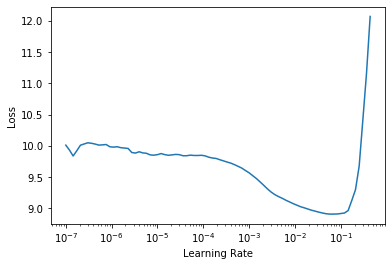

In [15]:
%%time
learn.lr_find()

The learning rate finder curve suggests picking a lr min of 6e-3. Let's use 2e-3.

In [16]:
learn.fit_one_cycle(1, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.803344,3.640777,0.325177,38.121441,5:48:31


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



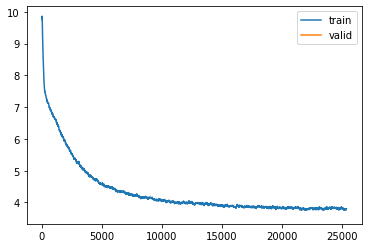

In [101]:
#hide
learn.recorder.plot_loss()

In just **one epoch**, our model passed 
- from an accuracy of 9.90% to **32.52%**
- from a perplexity of 20950.94 to **38.12**

Not too bad! 

Now, We can pass `-2` to `freeze_to` to freeze all except the last two parameter groups.

In [105]:
learn.save(path_data/'GPT2_pt_1epoch_lr2e-3')
learn = learn.load(path_data/'GPT2_pt_1epoch_lr2e-3')

In [12]:
# model size
!du -hs {path_data}/'GPT2_pt_1epoch_lr2e-3.pth'

788M	/mnt/home/pierre/.fastai/data/ptwiki/GPT2_pt_1epoch_lr2e-3.pth


##### 6.2.2 Freeze all layers but the last 2 layers groups

In [53]:
learn.freeze_to(-2)
learn.summary()

GPT2LMHeadModel (Input shape: ['8 x 1024'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            8 x 1024 x 768       38,597,376 True      
________________________________________________________________
Embedding            8 x 1024 x 768       786,432    True      
________________________________________________________________
Dropout              8 x 1024 x 768       0          False     
________________________________________________________________
LayerNorm            8 x 1024 x 768       1,536      False     
________________________________________________________________
Conv1D               8 x 1024 x 2304      1,771,776  False     
________________________________________________________________
Conv1D               8 x 1024 x 768       590,592    False     
________________________________________________________________
Dropout              8 x 12 x 1024 x 102  0          False     
______________________________________________________

The `learn.summary ()` method gives almost the right numbers. In fact, it counts twice the weights of the wte matrix (vocab embeddings) because they are duplicated in the weights of the output linear layer.

The real numbers are:
- Total params: 163,037,184 - 38,597,376 = **124,439,808** (about 124 millions)
- Total trainable params: 106,334,208 - 38,597,376 = **67,736,832** (about 68 millions)
- Total non-trainable params: **56,702,976** (about 57 millions)

In [19]:
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.453913,3.301886,0.362879,27.163816,5:38:18


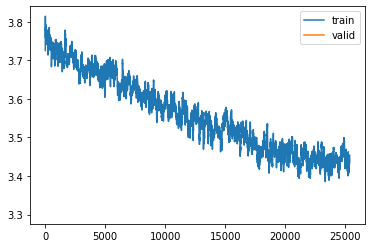

In [20]:
#hide
learn.recorder.plot_loss()

In [58]:
learn.save(path_data/'GPT2_pt_2epoch_lr1e-3')
learn = learn.load(path_data/'GPT2_pt_2epoch_lr1e-3')

In [13]:
# model size
!du -hs {path_data}/'GPT2_pt_2epoch_lr1e-3.pth'

1004M	/mnt/home/pierre/.fastai/data/ptwiki/GPT2_pt_2epoch_lr1e-3.pth


##### 6.2.3 Freeze all layers but the last 3 layers groups

In [59]:
learn.freeze_to(-3)
learn.summary()

GPT2LMHeadModel (Input shape: ['8 x 1024'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            8 x 1024 x 768       38,597,376 True      
________________________________________________________________
Embedding            8 x 1024 x 768       786,432    True      
________________________________________________________________
Dropout              8 x 1024 x 768       0          False     
________________________________________________________________
LayerNorm            8 x 1024 x 768       1,536      False     
________________________________________________________________
Conv1D               8 x 1024 x 2304      1,771,776  False     
________________________________________________________________
Conv1D               8 x 1024 x 768       590,592    False     
________________________________________________________________
Dropout              8 x 12 x 1024 x 102  0          False     
______________________________________________________

The `learn.summary ()` method gives almost the right numbers. In fact, it counts twice the weights of the wte matrix (vocab embeddings) because they are duplicated in the weights of the output linear layer.

The real numbers are:
- Total params: 163,037,184 - 38,597,376 = **124,439,808** (about 124 millions)
- Total trainable params: 134,685,696 - 38,597,376 = **96,088,320** (about 96 millions)
- Total non-trainable params: **28,351,488** (about 28 millions)

In [22]:
learn.fit_one_cycle(1, slice(5e-4/(2.6**4),5e-4))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.333389,3.207390,0.374579,24.714487,6:20:51


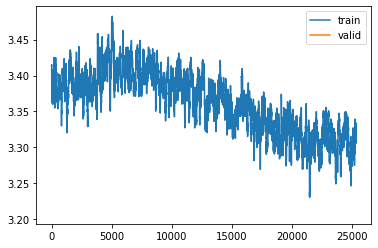

In [23]:
#hide
learn.recorder.plot_loss()

In [24]:
learn.save(path_data/'GPT2_pt_3epoch_lr5e-4')
learn = learn.load(path_data/'GPT2_pt_3epoch_lr5e-4')

In [7]:
# model size
!du -hs {path_data}/'GPT2_pt_3epoch_lr5e-4.pth'

1.2G	/mnt/home/pierre/.fastai/data/ptwiki/GPT2_pt_3epoch_lr5e-4.pth


##### 6.2.4 Unfreeze all layers

In [23]:
learn.unfreeze()
learn.summary()

GPT2LMHeadModel (Input shape: ['8 x 1024'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            8 x 1024 x 768       38,597,376 True      
________________________________________________________________
Embedding            8 x 1024 x 768       786,432    True      
________________________________________________________________
Dropout              8 x 1024 x 768       0          False     
________________________________________________________________
LayerNorm            8 x 1024 x 768       1,536      True      
________________________________________________________________
Conv1D               8 x 1024 x 2304      1,771,776  True      
________________________________________________________________
Conv1D               8 x 1024 x 768       590,592    True      
________________________________________________________________
Dropout              8 x 12 x 1024 x 102  0          False     
______________________________________________________

The `learn.summary ()` method gives almost the right numbers. In fact, it counts twice the weights of the wte matrix (vocab embeddings) because they are duplicated in the weights of the output linear layer.

The real numbers are:
- Total params: 163,037,184 - 38,597,376 = **124,439,808** (about 124 millions)
- Total trainable params: 163,037,184 - 38,597,376 = **124,439,808** (about 124 millions)
- Total non-trainable params: **0**

In [20]:
learn.fit_one_cycle(2, slice(1e-4/(2.6**4),1e-4))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.288433,3.186721,0.377380,24.208906,6:06:29
1,3.232569,3.167864,0.379885,23.756687,6:16:22


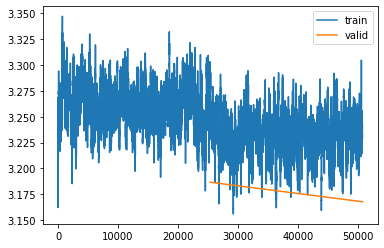

In [21]:
#hide
learn.recorder.plot_loss()

In [22]:
learn.save(path_data/'GPT2_pt_5epoch_lr1e-4_v2')
learn = learn.load(path_data/'GPT2_pt_5epoch_lr1e-4_v2')

In [8]:
# model size
!du -hs {path_data}/'GPT2_pt_5epoch_lr1e-4_v2.pth'

1.5G	/mnt/home/pierre/.fastai/data/ptwiki/GPT2_pt_5epoch_lr1e-4_v2.pth


## Model sharing and uploading in the Hugging Face model hub

Let’s see now how we can share our Portuguese GPT-2 on the Hugging Face [model hub](https://huggingface.co/models) (source: [Model sharing and uploading](https://huggingface.co/transformers/model_sharing.html)).

### Basic steps

In [17]:
# directory with the name you want your model to have on the model hub
lang = 'pt'
name = f'{lang}wiki'
path_to_awesome_name_you_picked = data_path/name/'gpt2-small-portuguese'
path_to_awesome_name_you_picked.mkdir(exist_ok=True, parents=True)

In [65]:
# fastai v2 learner with the fine-tuned Portuguese GPT-2 model
learn = Learner(dls, model_en, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_fp16()
learn = learn.load(path_data/'GPT2_pt_5epoch_lr1e-4_v2')

# get the model (we already have the tokenizer in tokenizer_pt)
model_pt = learn.model

In [19]:
# save tokenizer and model
model_pt.save_pretrained(f"{str(path_to_awesome_name_you_picked)}")
tokenizer_pt.save_pretrained(f"{str(path_to_awesome_name_you_picked)}")

('/storage/data/ptwiki/gpt2-small-portuguese/vocab.json',
 '/storage/data/ptwiki/gpt2-small-portuguese/merges.txt',
 '/storage/data/ptwiki/gpt2-small-portuguese/special_tokens_map.json',
 '/storage/data/ptwiki/gpt2-small-portuguese/added_tokens.json')

### Make your model work on all frameworks

As we trained our model in PyTorch, we have to create a TensorFlow version with the following code:

In [ ]:
# !pip install --upgrade tensorflow

First, check that our model class exists in the other framework, that is try to import the same model by either adding or removing TF: 

In [25]:
# source: https://huggingface.co/transformers/model_doc/gpt2.html#tfgpt2lmheadmodel
from transformers import TFGPT2LMHeadModel
import tensorflow as tf

In [26]:
# save TensorFlow model
tf_model = TFGPT2LMHeadModel.from_pretrained(f"{str(path_to_awesome_name_you_picked)}", from_pt=True)
tf_model.save_pretrained(f"{str(path_to_awesome_name_you_picked)}")

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

Some weights or buffers of the PyTorch model TFGPT2LMHeadModel were not initialized from the TF 2.0 model and are newly initialized: ['transformer.h.7.attn.bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.0.attn.bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'lm_head.weight', 'transformer.h.6.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.8.attn.bias', 'transformer.h.1.attn.bias', 'transformer.h.6.attn.bias', 'transformer.h.10.attn.bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.5.attn.bias', 'transformer.h.4.attn.bias', 'transformer.h.2.attn.bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.11.attn.bias', 'transformer.h.3.attn.bias', 'transformer.h.9.attn.bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.0.attn.mask

### Check the directory before uploading

- a `config.json` file, which saves the configuration of your model ;
- a `pytorch_model.bin` file, which is the PyTorch checkpoint (unless you can’t have it for some reason) ;
- a `tf_model.h5` file, which is the TensorFlow checkpoint (unless you can’t have it for some reason) ;
- a `special_tokens_map.json`, which is part of your tokenizer save;
- a `tokenizer_config.json`, which is part of your tokenizer save;
- a `vocab.txt`, which is the vocabulary of your tokenizer, part of your tokenizer save;
-  maybe a `added_tokens.json`, which is part of your tokenizer save.

In [28]:
for fn in path_to_awesome_name_you_picked.ls():
    print(fn)

/storage/data/ptwiki/gpt2-small-portuguese/tf_model.h5
/storage/data/ptwiki/gpt2-small-portuguese/config.json
/storage/data/ptwiki/gpt2-small-portuguese/vocab.json
/storage/data/ptwiki/gpt2-small-portuguese/pytorch_model.bin
/storage/data/ptwiki/gpt2-small-portuguese/tokenizer_config.json
/storage/data/ptwiki/gpt2-small-portuguese/special_tokens_map.json
/storage/data/ptwiki/gpt2-small-portuguese/merges.txt


In [42]:
!du -ah

475M	./tf_model.h5
4.0K	./config.json
832K	./vocab.json
487M	./pytorch_model.bin
4.0K	./tokenizer_config.json
4.0K	./special_tokens_map.json
500K	./merges.txt
963M	.


### Upload your model with the CLI

Now go in a terminal and run the following command. It should be in the virtual enviromnent where you installed 🤗 Transformers, since that command transformers-cli comes from the library.

`transformers-cli login`

Then log in using the same credentials as on huggingface.co. To upload your model, just type

`cd storage/data/ptwiki
transformers-cli upload '/storage/data/ptwiki/gpt2-small-portuguese'`

This uploads the model to our personal account. 

```
About to upload file /storage/data/ptwiki/gpt2-small-portuguese/tf_model.h5 to S3 under filename gpt2-small-portuguese/tf_model.h5 and namespace pierreguillou
About to upload file /storage/data/ptwiki/gpt2-small-portuguese/config.json to S3 under filename gpt2-small-portuguese/config.json and namespace pierreguillou
About to upload file /storage/data/ptwiki/gpt2-small-portuguese/vocab.json to S3 under filename gpt2-small-portuguese/vocab.json and namespace pierreguillou
About to upload file /storage/data/ptwiki/gpt2-small-portuguese/pytorch_model.bin to S3 under filename gpt2-small-portuguese/pytorch_model.bin and namespace pierreguillou
About to upload file /storage/data/ptwiki/gpt2-small-portuguese/tokenizer_config.json to S3 under filename gpt2-small-portuguese/tokenizer_config.json and namespace pierreguillou
About to upload file /storage/data/ptwiki/gpt2-small-portuguese/special_tokens_map.json to S3 under filename gpt2-small-portuguese/special_tokens_map.json and namespace pierreguillou
About to upload file /storage/data/ptwiki/gpt2-small-portuguese/merges.txt to S3 under filename gpt2-small-portuguese/merges.txt and namespace pierreguillou

Proceed? [Y/n] Y

Uploading... This might take a while if files are large

Your file now lives at:
https://s3.amazonaws.com/models.huggingface.co/bert/pierreguillou/gpt2-small-portuguese/tf_model.h5
Your file now lives at:
https://s3.amazonaws.com/models.huggingface.co/bert/pierreguillou/gpt2-small-portuguese/config.json
Your file now lives at:
https://s3.amazonaws.com/models.huggingface.co/bert/pierreguillou/gpt2-small-portuguese/vocab.json
Your file now lives at:
https://s3.amazonaws.com/models.huggingface.co/bert/pierreguillou/gpt2-small-portuguese/pytorch_model.bin
Your file now lives at:
https://s3.amazonaws.com/models.huggingface.co/bert/pierreguillou/gpt2-small-portuguese/tokenizer_config.json
Your file now lives at:
https://s3.amazonaws.com/models.huggingface.co/bert/pierreguillou/gpt2-small-portuguese/special_tokens_map.json
Your file now lives at:
https://s3.amazonaws.com/models.huggingface.co/bert/pierreguillou/gpt2-small-portuguese/merges.txt
```

Our model will then be accessible through its identifier, which is, as we saw above, `pierreguillou/gpt2-small-portuguese`.

### Add a model card

Just click on the “Create a model card on GitHub” button on the model page, it will get you directly to the right location.

### Using your model

Your model now has a page on huggingface.co/models 🔥

Anyone can load it from code:

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("namespace/awesome-name-you-picked")
model = AutoModel.from_pretrained("namespace/awesome-name-you-picked")

In our case, the code is:

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("pierreguillou/gpt2-small-portuguese")
model = AutoModelWithLMHead.from_pretrained("pierreguillou/gpt2-small-portuguese")

Check our [Hugging face model page](https://huggingface.co/pierreguillou/gpt2-small-portuguese) to get more information.

## Text Generation by our Portuguese GPT-2

Now that we have a GPT-2 in Portuguese, we can use it for different tasks in NLP (Text Generation, Reading Comprehension, Translation, Summary) as showed in the post "**GPT-2 use cases: beyond Text Generation**".

For now, let's use it to generate new texts, which allows us to check that it works properly and also have a little fun.

### Text Generation techniques 

**At each stage of text generation, GPT-2 provides a vector of 50.257 probabilities** (each corresponds to a possible token of the vocabulary whose size is 50.257). To decide how to choose the output token from these probabilities, **there are at least 5 methods: Greedy, Beam Search, Sampling with temperature, Top-k sampling and Top-p (nucleus) sampling**.

In this tutorial, we will test only 2 of these text generation methods: **Top-k sampling** and **Top-p (nucleus) sampling**.

Note: to get more information on text generation techniques for transformer-based language model, read the article "[How to generate text: using different decoding methods for language generation with Transformers](https://huggingface.co/blog/how-to-generate)" from [Patrick von Platen](https://huggingface.co/patrickvonplaten) (Hugging Face, 03/18/2020).

#### (Use case 1) Top-k sampling

Our use case 1 follows the same method used by OpenAI in page 20 of the paper [Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf) by choosing **Top-k sampling** text generation technique with a **value of 40**.

This text generation method is implemented in the `model.generate()` function of a Transformers model thanks to the following arguments:
- `top_k` (int): the number of highest probability vocabulary tokens to keep for top-k-filtering. Between 1 and infinity. Default to 50.

#### (Use case 2) Top-p (nucleus) sampling

Our use case 2 follows the [top-p (nucleus) sampling](https://huggingface.co/blog/how-to-generate#top-p-nucleus-sampling) method with Top-p sampling (top_p = 0.95), top-k sampling (top_k = 50), temperature (temperature = 0.7) and repetition penalty (repetition_penalty = 1.2).

This text generation method is implemented in the `model.generate()` function of a Transformers model thanks to the following arguments:
- `top_p` (float): the cumulative probability of parameter highest probability vocabulary tokens to keep for nucleus sampling. Must be between 0 and 1. Default to 1.
- `top_k` (int): the number of highest probability vocabulary tokens to keep for top-k-filtering. Between 1 and infinity. Default to 50.
- `temperature` (float): the value used to module the next token probabilities. Must be strictly positive. Default to 1.0.
- `repetition_penalty` (float): the parameter for repetition penalty. Between 1.0 and infinity. 1.0 means no penalty. Default to 1.0.

### Text n°1 | Famous OpenAI generated text about unicorns

At the time of publication of GPT-2 in the article "[Better Language Models and Their Implications](https://openai.com/blog/better-language-models/)" (02/14/2019), the media retained from its different possibilities in NLP that of text generation because of the now famous text generated on unicorns from this small paragraph:

>In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.

From this text, GPT-2 wrote the following [sample](https://openai.com/blog/better-language-models/#samples) out of 10 tries:

In [6]:
openai_generated_text_en = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English. \
\n\nThe scientist named the population, after their distinctive horn, Ovid's Unicorn. These four-horned, silver-white unicorns were previously unknown to science. \
\n\nNow, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved. \
\n\nDr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow. \
\n\nPérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez. \
\n\nPérez and his friends were astonished to see the unicorn herd. These creatures could be seen from the air without having to move too much to see them – they were so close they could touch their horns. \
\n\nWhile examining these bizarre creatures the scientists discovered that the creatures also spoke some fairly regular English. Pérez stated, “We can see, for example, that they have a common ‘language,’ something like a dialect or dialectic.” \
\n\nDr. Pérez believes that the unicorns may have originated in Argentina, where the animals were believed to be descendants of a lost race of people who lived there before the arrival of humans in those parts of South America. \
\n\nWhile their origins are still unclear, some believe that perhaps the creatures were created when a human and a unicorn met each other in a time before human civilization. According to Pérez, “In South America, such incidents seem to be quite common.” \
\n\nHowever, Pérez also pointed out that it is likely that the only way of knowing for sure if unicorns are indeed the descendants of a lost alien race is through DNA. “But they seem to be able to communicate in English quite well, which I believe is a sign of evolution, or at least a change in social organization,” said the scientist."

print(openai_generated_text_en)

In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English. 

The scientist named the population, after their distinctive horn, Ovid's Unicorn. These four-horned, silver-white unicorns were previously unknown to science. 

Now, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved. 

Dr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow. 

Pérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez. 

Pérez and h

#### Reload Portuguese GPT-2

##### English pre-trained GPT-2

In [6]:
%%time
from transformers import GPT2TokenizerFast, GPT2LMHeadModel

pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model_en = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 14.4 s, sys: 1.8 s, total: 16.2 s
Wall time: 7.72 s


##### Portuguese tokenizer

In [7]:
from transformers import GPT2TokenizerFast

# Get the path to ByteLevelBPE_tokenizer_pt config files
ByteLevelBPE_tokenizer_pt_rep = 'ByteLevelBPE_tokenizer_pt'
path_to_ByteLevelBPE_tokenizer_pt_rep = path_data/ByteLevelBPE_tokenizer_pt_rep

# import the pre-trained GPT2TokenizerFast tokenizer with the tokenizer_pt config files
tokenizer_pt = GPT2TokenizerFast.from_pretrained(
    str(path_to_ByteLevelBPE_tokenizer_pt_rep), 
    pad_token='<|endoftext|>')

# Get sequence length max of 1024
tokenizer_pt.model_max_length = 1024

##### Datasets

In [8]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [9]:
# get data
lang = 'pt'
fname = f'all_texts_{lang}wiki.csv'
df = pd.read_csv(path_data/fname)

# load idxs train and valid
idxs_train = torch.load(path_data/'idxs_train.pt')
idxs_val = torch.load(path_data/'idxs_val.pt')

all_texts = np.concatenate([df.iloc[idxs_train].text.values, df.iloc[idxs_val].text.values])
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer_pt), splits=splits, dl_type=LMDataLoader)

##### Dataloaders

In [10]:
%%time
bs,sl = 8,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

CPU times: user 27min 56s, sys: 3min 20s, total: 31min 16s
Wall time: 25min 8s


##### Split a GPT2 model in 4 groups for differential learning rates

In [11]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [12]:
def splitter(model):
    "Split a GPT2 `model` in 3 groups for differential learning rates."
    
    # First layers group : decoder blocks from 0 to 3
    modules = []
    for i in range(4): modules.append(model.transformer.h[i])
    groups = [nn.Sequential(*modules)]

    # Second layers group : decoder blocks from 4 to 7
    modules = []
    for i in range(4,8,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])

    # Third layers group : decoder blocks from 8 to 11
    modules = []
    for i in range(8,12,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])
    
    # Fourth layers group : embeddings matrices wte and wpe + LayerNorm at the model output
    groups = L(groups + [nn.Sequential(model.transformer.wte,model.transformer.wpe,model.transformer.ln_f)])
    
    return groups.map(params)

##### Learner

In [13]:
# Learner: basic class for handling the training loop
# source: https://dev.fast.ai/learner#Learner
learn = Learner(dls, model_en, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_fp16()
learn = learn.load(path_data/'GPT2_pt_5epoch_lr1e-4_v2')

In [14]:
# model
model_pt = learn.model

In [15]:
# put model into eval mode and on GPU
model_pt.eval();
model_pt.to('cuda');

#### Get translated famous unicorn text in Portuguese

In [16]:
from transformers import MarianMTModel, MarianTokenizer

In [17]:
# MarianMT Translator
model_name = 'Helsinki-NLP/opus-mt-en-ROMANCE'
tokenizer_en_pt = MarianTokenizer.from_pretrained(model_name)
print(tokenizer_en_pt.supported_language_codes)
model_en_pt = MarianMTModel.from_pretrained(model_name)

['>>fr<<', '>>es<<', '>>it<<', '>>pt<<', '>>pt_br<<', '>>ro<<', '>>ca<<', '>>gl<<', '>>pt_BR<<', '>>la<<', '>>wa<<', '>>fur<<', '>>oc<<', '>>fr_CA<<', '>>sc<<', '>>es_ES<<', '>>es_MX<<', '>>es_AR<<', '>>es_PR<<', '>>es_UY<<', '>>es_CL<<', '>>es_CO<<', '>>es_CR<<', '>>es_GT<<', '>>es_HN<<', '>>es_NI<<', '>>es_PA<<', '>>es_PE<<', '>>es_VE<<', '>>es_DO<<', '>>es_EC<<', '>>es_SV<<', '>>an<<', '>>pt_PT<<', '>>frp<<', '>>lad<<', '>>vec<<', '>>fr_FR<<', '>>co<<', '>>it_IT<<', '>>lld<<', '>>lij<<', '>>lmo<<', '>>nap<<', '>>rm<<', '>>scn<<', '>>mwl<<']


In [18]:
src_text = [
    '>>pt_BR<< In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.',
]
print(src_text)

['>>pt_BR<< In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.']


In [19]:
translated = model_en_pt.generate(**tokenizer_en_pt.prepare_translation_batch(src_text))
tgt_text = [tokenizer_en_pt.decode(t, skip_special_tokens=True) for t in translated]
prompt = tgt_text[0]
prompt

'Num achado chocante, o cientista descobriu uma manada de unicórnios vivendo num vale remoto, anteriormente inexplorado, nas Montanhas dos Andes. Ainda mais surpreendente para os pesquisadores foi o fato de que os unicórnios falavam inglês perfeito.'

#### Get generated text

In [20]:
# Get the number of tokens of the OpenAI English generated text
openai_generated_text_en = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English. \
\n\nThe scientist named the population, after their distinctive horn, Ovid's Unicorn. These four-horned, silver-white unicorns were previously unknown to science. \
\n\nNow, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved. \
\n\nDr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow. \
\n\nPérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez. \
\n\nPérez and his friends were astonished to see the unicorn herd. These creatures could be seen from the air without having to move too much to see them – they were so close they could touch their horns. \
\n\nWhile examining these bizarre creatures the scientists discovered that the creatures also spoke some fairly regular English. Pérez stated, “We can see, for example, that they have a common ‘language,’ something like a dialect or dialectic.” \
\n\nDr. Pérez believes that the unicorns may have originated in Argentina, where the animals were believed to be descendants of a lost race of people who lived there before the arrival of humans in those parts of South America. \
\n\nWhile their origins are still unclear, some believe that perhaps the creatures were created when a human and a unicorn met each other in a time before human civilization. According to Pérez, “In South America, such incidents seem to be quite common.” \
\n\nHowever, Pérez also pointed out that it is likely that the only way of knowing for sure if unicorns are indeed the descendants of a lost alien race is through DNA. “But they seem to be able to communicate in English quite well, which I believe is a sign of evolution, or at least a change in social organization,” said the scientist."

openai_generated_text_en_ids = tokenizer_en.encode(openai_generated_text_en, return_tensors='pt').to('cuda')
max_length = openai_generated_text_en_ids.shape[1]

print(max_length)

504


In [21]:
# encode
input_ids = tokenizer_pt.encode(prompt, return_tensors='pt').to('cuda')

##### Use case 1 (Top-k sampling)

In [51]:
%%time
#set top_k = 40 and num_return_sequences = 3
sample_outputs = model_pt.generate(input_ids, pad_token_id=50256,
                                   do_sample=True, 
                                   max_length=max_length, 
                                   min_length=max_length,
                                   top_k=40,
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer_pt.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

Num achado chocante, o cientista descobriu uma manada de unicórnios vivendo num vale remoto, anteriormente inexplorado, nas Montanhas dos Andes. Ainda mais surpreendente para os pesquisadores foi o fato de que os unicórnios falavam inglês perfeito. Um deles, um escocês chamado Thomas (um anatomista irlandês) que havia trabalhado com o britânico em seu trabalho como assistente do diretor experimental da universidade, John Holley, foi chamado de por eles para um encontro sobre os dois conceitos, que não tinham encontrado muito trabalho até o momento. Eles foram palestrantes, mas ficaram impressionados que Thomas (como todos os outros cientistas da época) não sabia falar Inglês. Quando Thomas fez isso com os unicórnios por engano, Holley a escreveu e enviou um telegrama à BBC perguntando: ""Tão, o que é tal dizer se você quer saber de nenhum outro, eu não sei como ele fala inglês?"" Eles disseram a ele: "Não, mas é um idiota." Então, uma semana depois, no mesmo dia, H

##### Use case 2 (Top-p nucleus sampling)

In [22]:
%%time
#set top_p = 0.95, top_k = 50, temperature = 0.7, repetition_penalty = 1.2 and num_return_sequences = 3
sample_outputs = model_pt.generate(input_ids, pad_token_id=50256,
                                   do_sample=True,
                                   max_length=max_length, 
                                   min_length=max_length,
                                   repetition_penalty=1.2,
                                   temperature=0.7,
                                   top_k=50, 
                                   top_p=0.95, 
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer_pt.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

Num achado chocante, o cientista descobriu uma manada de unicórnios vivendo num vale remoto, anteriormente inexplorado, nas Montanhas dos Andes. Ainda mais surpreendente para os pesquisadores foi o fato de que os unicórnios falavam inglês perfeito. Eles não sabiam onde exatamente eram falantes nativos do idioma, e acreditaram que eles simplesmente migraram das terras altas da região de Mendoza ao norte como consequência do declínio populacional que ocorreu na Cordilheira das Cobras.

Em 2004, o Departamento de Antropologia da Universidade do Colorado anunciou que havia encontrado uma fêmea no vale do rio Orinoco na Bolívia, mas essa fêmea foi morta durante a investigação. No entanto, no início de 2006, as autoridades locais anunciaram que havia identificado uma fêmea encontrada em uma área próxima à Cordilheira dos Andes, no Vale do Cauca. A equipe de pesquisadores relatou que esta fêmea era chamada de "El Maria" ou "El Maria".

O estudo revelou que o grupo de unic

### Text n°2 | Recent text on the coronavirus disease (Covid-19)

In [54]:
# source (uol, 07/13/2020): https://www.uol.com.br/vivabem/noticias/redacao/2020/07/13/russia-vacina-conclui-testes-distribuicao-em-agosto.htm
prompt = "A Rússia está mais perto de se tornar o primeiro país a iniciar a distribuição de uma vacina contra o coronavírus para a população. O país anunciou hoje que concluiu parte dos testes clínicos necessários para comprovar a eficácia da imunização desenvolvida por iniciativa do governo russo. A expectativa é de que a distribuição comece já em agosto."
print(prompt)

A Rússia está mais perto de se tornar o primeiro país a iniciar a distribuição de uma vacina contra o coronavírus para a população. O país anunciou hoje que concluiu parte dos testes clínicos necessários para comprovar a eficácia da imunização desenvolvida por iniciativa do governo russo. A expectativa é de que a distribuição comece já em agosto.


In [55]:
# encode
input_ids = tokenizer_pt.encode(prompt, return_tensors='pt').to('cuda')

##### Use case 1 (Top-k sampling)

In [56]:
%%time
#set top_k = 40 and num_return_sequences = 3
sample_outputs = model_pt.generate(input_ids, pad_token_id=50256,
                                   do_sample=True, 
                                   max_length=max_length, 
                                   min_length=max_length,
                                   top_k=40,
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer_pt.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

A Rússia está mais perto de se tornar o primeiro país a iniciar a distribuição de uma vacina contra o coronavírus para a população. O país anunciou hoje que concluiu parte dos testes clínicos necessários para comprovar a eficácia da imunização desenvolvida por iniciativa do governo russo. A expectativa é de que a distribuição comece já em agosto.

Entre os primeiros casos confirmados de COVID-19 na Rússia estava um homem russo com idade entre 50 e 49 anos, segundo o jornal " Moscow" e o primeiro caso em 28 de fevereiro, a primeira no Hospital Pulkai.

No entanto, os primeiros casos foram mais sérios devido sua "maturidade sem gravidade" e a falta de uma pessoa estar disponível para testes de suas condições de vida. Entre os pacientes que foram considerados estão funcionários de um hospital ou enfermeiros na cidade de Moscou (ver abaixo) ou médicos. Depois de serem testados negativos após um teste positivo, o paciente se recupera completamente.

Os russos também anu

##### Use case 2 (Top-p nucleus sampling)

In [58]:
%%time
#set top_p = 0.95, top_k = 50, temperature = 0.7, repetition_penalty = 1.2 and num_return_sequences = 3
sample_outputs = model_pt.generate(input_ids, pad_token_id=50256,
                                   do_sample=True,
                                   max_length=max_length, 
                                   min_length=max_length,
                                   repetition_penalty=1.2,
                                   temperature=0.7,
                                   top_k=50, 
                                   top_p=0.95, 
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer_pt.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

A Rússia está mais perto de se tornar o primeiro país a iniciar a distribuição de uma vacina contra o coronavírus para a população. O país anunciou hoje que concluiu parte dos testes clínicos necessários para comprovar a eficácia da imunização desenvolvida por iniciativa do governo russo. A expectativa é de que a distribuição comece já em agosto.

A Rússia tem um mercado interno bruto (PIB) estimado entre US$ 1,2 bilhões e US$ 7 bilhões. O PIB "per capita" em 2007 foi de US $ 4,348. A maior parte do crescimento econômico anual ocorreu na agricultura. Em 2003, a taxa média anual era de 22%.

Em 2004, cerca de 3 milhões de pessoas foram infectadas pelo coronavírus. Cerca de 17 mil casos foram identificados entre 2001 e 2002, incluindo aproximadamente 2,8% das crianças e adolescentes com idade inferior a seis anos; 5,1 milhão deles eram endêmicas ou sem cuidados médicos; 8,711 mortes ocorreram nos três primeiros meses de vida após o contato com o vírus; 13,6 mil havia

## Conclusion

We are the first, fortunately surprised by the efficiency of fine-tuning in Portuguese an English pre-trained transformer-based language model like GPT-2 small.

In about 1 day using 1 GPU and a little over 1 GB of Portuguese texts, we managed to obtain a **GPorTuguese-2 capable of generating contextual Portuguese texts of a level comparable to that of the GPT-2 used by OpenAI in 2019**.

Happy.

The next step would be to apply our fine-tuning method to most recent NLP models like GPT-3, BART, T5 or Reformer. Let’s do it?

## END